---
# IA - Class Prediction using Machine Learning Algorithms

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mct8 = pd.read_csv('MCT8_IA_dataset_T4.csv', index_col=0)
mct8.set_index('AA_change', inplace=True)
mct8.loc[mct8['Activity'] > 50, 'ClinSig'] = 0
mct8.loc[(mct8['Activity'] <= 50) & (mct8['Activity'] > 10), 'ClinSig'] = 1
mct8.loc[mct8['Activity'] <= 10, 'ClinSig'] = 2

In [2]:
mct8.loc[(mct8.evol_indices_init.isna()) | (mct8.evol_indices_mean.isna()), ['Activity','evol_indices_init', 'evol_indices_mean']]

,Activity,evol_indices_init,evol_indices_mean
AA_change,,,
Pro365Ala,97.0,NaN,NaN
Gly369Ala,102.5,NaN,NaN
Val213Ala,105.7,NaN,NaN
Val370Ala,102.5,NaN,NaN
Thr364Ala,97.0,NaN,NaN
Asn210Ala,95.4,NaN,NaN
Ser366Ala,108.3,NaN,NaN
Ser454Ala,91.6,NaN,NaN
Ser586Ala,108.9,NaN,NaN


In [3]:
mct8

,Activity,Expression,PMExpression,LongPosition,TMD,ICL,ECL,MembraneFacing,ChannelFacing,Buried,...,MISA,SASA,SCSA,SIS,MAESTRO_ddG,FoldX_ddG,dCOM,evol_indices_init,evol_indices_mean,ClinSig
AA_change,,,,,,,,,,,,,,,,,,,,,
Pro169Ala,95.8,NaN,NaN,169,0.0,1.0,0.0,0.0,0.0,0.0,...,0.045,38.905,0.00,0.000,0.583984,2.033333,26.782026,4.484985,4.504437,0.0
Pro233Ala,24.7,NaN,NaN,233,1.0,0.0,0.0,1.0,0.0,0.0,...,17.645,16.210,8.43,0.000,-0.502685,2.666667,14.001623,5.286438,5.533997,1.0
Pro289Ala,69.8,NaN,NaN,289,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000,4.510,0.00,0.000,-0.469728,2.466667,13.171551,5.843872,5.583874,0.0
Pro321Ala,81.1,NaN,NaN,321,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000,2.270,0.00,0.000,-0.382626,2.800000,18.156483,5.011963,5.110223,0.0
Pro356Ala,73.1,NaN,NaN,356,0.0,1.0,0.0,0.0,0.0,0.0,...,0.040,61.120,0.00,0.000,0.503667,1.400000,23.227317,6.271729,6.504669,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Asp498Asn,4.8,83.8,106.6,498,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000,31.145,32.82,26.315,0.071375,1.200000,10.968726,7.860901,7.997272,2.0
Met476Ile,104.5,NaN,NaN,476,1.0,0.0,0.0,1.0,0.0,0.0,...,45.490,0.000,0.00,0.000,-0.363989,1.000000,22.697429,1.725952,1.793298,0.0
Val489Asp,40.1,NaN,NaN,489,1.0,0.0,0.0,1.0,0.0,0.0,...,31.845,20.375,0.00,0.000,-0.645502,0.100000,24.062603,9.147888,9.454669,1.0


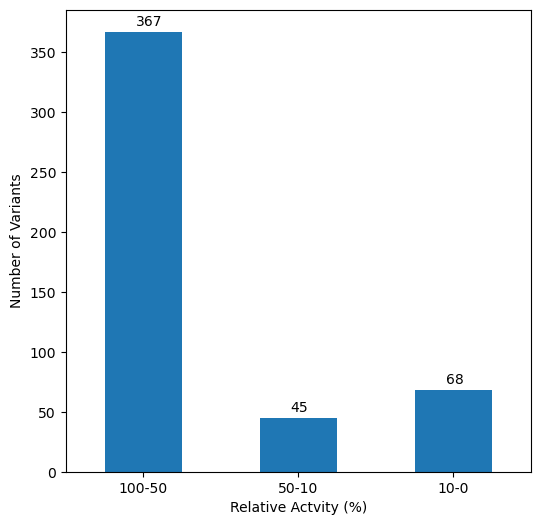

In [4]:
mct8.reset_index().groupby('ClinSig')['AA_change'].count().plot.bar(figsize=(6,6))
for i, y in enumerate(mct8.reset_index().groupby('ClinSig')['AA_change'].count()):
    plt.text(i-0.05, y+5, str(y), color='black')
plt.ylabel('Number of Variants')
plt.xlabel('Relative Actvity (%)')
plt.xticks([0,1,2], ['100-50', '50-10', '10-0'], rotation=0)
plt.savefig('MCT8_3_Classes_50_10.png')
plt.show()

In [5]:
# Defining two different Classes
mct8.loc[(mct8['Activity'] > 50), 'ClinSig'] = 0
mct8.loc[mct8['Activity'] <= 50, 'ClinSig'] = 1

In [6]:
# Defining the datasets
features = [x for x in mct8.columns if x not in ['Activity', 'Expression', 'PMExpression', 'LongPosition', 'ClinSig']]
X = mct8.loc[:, features]
y = mct8['ClinSig']

categorical_features = ['TMD', 'ICL', 'ECL', 'MembraneFacing', 'ChannelFacing', 'Buried',
                        'SubstrateInteraction', 'OSIR', 'TMDbinder', 'HelixStructure', 'LoopConformation']
numerical_features = [x for x in X.columns if x not in categorical_features]

I will use everything for training and validate with cross-validation.

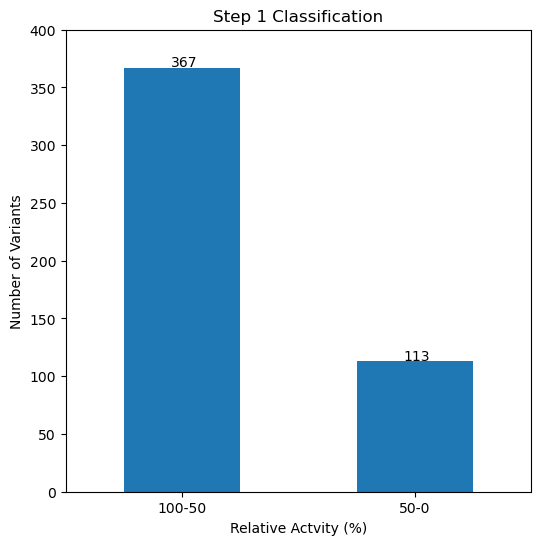

In [7]:
y.reset_index().groupby('ClinSig')['AA_change'].count().plot.bar(figsize=(6,6))
for i, j in enumerate(y.reset_index().groupby('ClinSig')['AA_change'].count()):
    plt.text(i-0.05, j+1, str(j), color='black')
plt.ylabel('Number of Variants')
plt.ylim((0, 400))
plt.xlabel('Relative Actvity (%)')
plt.xticks([0,1], ['100-50', '50-0'], rotation=0)
plt.title('Step 1 Classification')
plt.savefig('MCT8_2_Classes_step_1_50.png')
plt.show()

In this case I will not downsampled!!

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

numeric_transformer_1 = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean')),
       ('scaler', StandardScaler())
])

categorical_transformer_1 = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent'))
      ])

preprocessor_1 = ColumnTransformer(
   transformers=[    
   ('numeric', numeric_transformer_1, numerical_features),
   ('categorical', categorical_transformer_1, categorical_features)
]) 

X = preprocessor_1.fit_transform(X)

In [9]:
# Wrapper method - Recursive Feature Selection - Using coefficients of LR
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(fit_intercept=False, max_iter=100000)
rfecv = RFECV(LR, scoring="f1")
rfecv = rfecv.fit(X, y)

columns_names = numerical_features+categorical_features

RFE_features_LR_1 = [columns_names[i] for i in list(np.where(rfecv.ranking_ <= 3)[0])]

In [10]:
ranking_RFE_1 = dict(zip(columns_names, list(rfecv.ranking_)))

ranking_RFE_1 = sorted(ranking_RFE_1.items(), key=lambda x:x[1])
ranking_RFE_1 = dict(ranking_RFE_1)
ranking_RFE_1

{'DAYM780301': 1,
 'LINK010101': 1,
 'FoldX_ddG_AF_OW': 1,
 'evol_indices_mean': 1,
 'TMD': 1,
 'ICL': 1,
 'ECL': 1,
 'GEOD900101': 2,
 'MDS_OW': 3,
 'RUSR970103': 4,
 'TUDE900101': 5,
 'OSIR': 6,
 'KOSJ950114': 7,
 'Buried': 8,
 'ChannelFacing': 9,
 'MembraneFacing': 10,
 'MOHR870101': 11,
 'OVEJ920102': 12,
 'PRLA000101': 13,
 'OVEJ920105': 14,
 'MEHP950102': 15,
 'LUTR910104': 16,
 'LUTR910109': 17,
 'OVEJ920104': 18,
 'CS4': 19,
 'SASA_OW': 20,
 'SCSA_OW': 21,
 'DOSZ010101': 22,
 'dCOM': 23,
 'KOSJ950107': 24,
 'HelixStructure': 25,
 'KOSJ950112': 26,
 'FoldX_ddG_HM_IW': 27,
 'SASA_IW': 28,
 'JOND920103': 29,
 'AZAE970102': 30,
 'CROG050101': 31,
 'FoldX_ddG': 32,
 'FoldX_ddG_HM_OW': 33,
 'FITW660101': 34,
 'CS2': 35,
 'KOSJ950105': 36,
 'OVEJ920101': 37,
 'CSEM940101': 38,
 'LUTR910105': 39,
 'PRLA000102': 40,
 'LoopConformation': 41,
 'MAESTRO_ddG_AF_OW': 42,
 'LUTR910106': 43,
 'GRAR740104': 44,
 'LUTR910103': 45,
 'NGPC000101': 46,
 'DOSZ010104': 47,
 'dCOM_HM_IW': 48,
 'KOSJ95

In [11]:
RFE_features_LR_1 

['MDS_OW',
 'GEOD900101',
 'DAYM780301',
 'LINK010101',
 'FoldX_ddG_AF_OW',
 'evol_indices_mean',
 'TMD',
 'ICL',
 'ECL']

In [12]:
def feature_selection_group1(selected_features, categorical_features=categorical_features, numerical_features=numerical_features):
    # DISCARDING NON-INFORMATIVE FEATURES
    # Defining the datasets
    X = mct8.loc[:, selected_features]
    y = mct8['ClinSig']
    
    # Pre-Processing
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures
    from sklearn.compose import ColumnTransformer

    categorical_features_ = [x for x in X.columns if x in categorical_features]
    numerical_features_ = [x for x in X.columns if x in numerical_features]

    numeric_transformer = Pipeline(steps=[
           ('imputer', SimpleImputer(strategy='mean')),
           ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
           ('imputer', SimpleImputer(strategy='most_frequent'))
          ])

    preprocessor = ColumnTransformer(
       transformers=[
        ('numeric', numeric_transformer, numerical_features_)
       ,('categorical', categorical_transformer, categorical_features_)
    ]) 

    X = preprocessor.fit_transform(X)    
    return X, y

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def ROC_binary(classifier, classifier_name, X, y, predict_proba='predict_proba'):
    plt.figure()
    print('Cross-Validation')

    probas = cross_val_predict(classifier, X, y, method=predict_proba, n_jobs=-1, cv=10)
    try:
        fpr, tpr, thresholds = roc_curve(y, probas[:,1])
    except:
        fpr, tpr, thresholds = roc_curve(y, probas)
    
    scores = cross_validate(classifier, X, y, n_jobs=-1, cv=10,
                            scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))    
    #accuracy = cross_val_score(classifier, X, y, n_jobs=-1, cv=10)
    
    plt.plot(fpr, tpr, label='Cross-Val AUC:'+str(round(np.mean(scores['test_roc_auc']), 2)))
    print(f'Accuracy:', round(np.mean(scores['test_accuracy']), 2), '(+-', round(np.std(scores['test_accuracy']), 2), ')')
    #print(f'Accuracy:', round(accuracy.mean(), 2), '(+-', round(accuracy.std(), 2), ')')
    print(f'f1-score:', round(np.mean(scores['test_f1']), 2), '(+-', round(np.std(scores['test_f1']), 2), ')')
    print(f'ROC:', round(np.mean(scores['test_roc_auc']), 2), '(+-', round(np.std(scores['test_roc_auc']), 2), ')')
    print(f'Precision:', round(np.mean(scores['test_precision']), 2), '(+-', round(np.std(scores['test_precision']), 2), ')')
    print(f'Recall:', round(np.mean(scores['test_recall']), 2), '(+-', round(np.std(scores['test_recall']), 2), ')')

    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc='lower right')
    plt.show()
       
    y_pred = cross_val_predict(classifier, X, y, cv=10)
    cm = confusion_matrix(y, y_pred)
                
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

LR
Cross-Validation
Accuracy: 0.89 (+- 0.04 )
f1-score: 0.71 (+- 0.16 )
ROC: 0.91 (+- 0.08 )
Precision: 0.84 (+- 0.13 )
Recall: 0.66 (+- 0.23 )


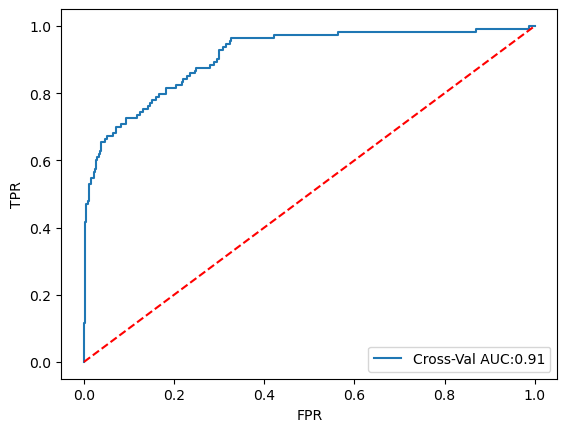

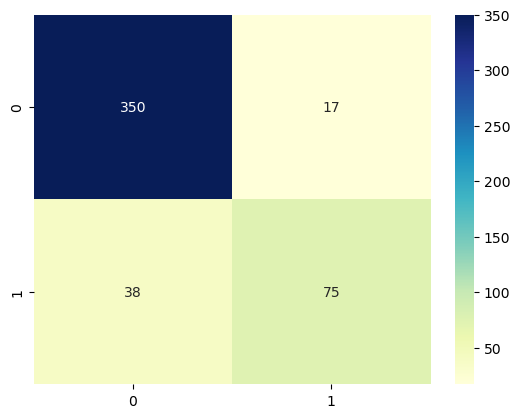

********************


In [14]:
from sklearn.linear_model import LogisticRegression

X, y = feature_selection_group1(RFE_features_LR_1)

print('LR')
classifier = LogisticRegression(fit_intercept=False, max_iter=100000).fit(X, y)
ROC_binary(classifier, 'Logistic Regression Default', X, y)
print('*'*20)

In [15]:
# Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameters = {'solver': ['saga'],
              'penalty': ['none', 'elasticnet'],
              'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
              
logreg_cv = GridSearchCV(classifier, parameters, cv=10, n_jobs=-1, verbose=1, 
                         refit=True, scoring='f1')
logreg_cv.fit(X, y)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(fit_intercept=False, max_iter=100000),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                         'penalty': ['none', 'elasticnet'],
                         'solver': ['saga']},
             scoring='f1', verbose=1)

In [16]:
print("Tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("Logistic Regression Optimized - f1:", logreg_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 1, 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}
Logistic Regression Optimized - f1: 0.7068978028074138


Cross-Validation
Accuracy: 0.89 (+- 0.04 )
f1-score: 0.71 (+- 0.16 )
ROC: 0.91 (+- 0.08 )
Precision: 0.84 (+- 0.13 )
Recall: 0.66 (+- 0.23 )


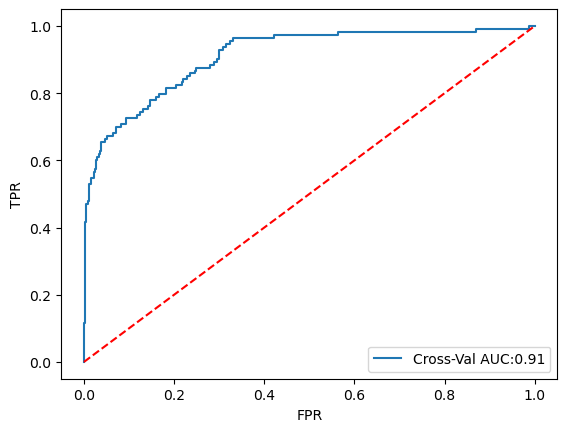

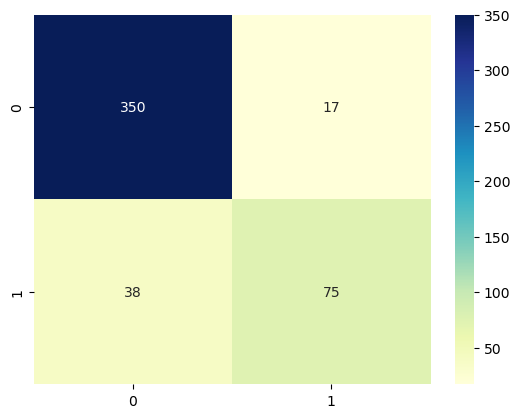

In [17]:
ROC_binary(logreg_cv.best_estimator_, 'Logistic Regression Optimized', X, y)

In [18]:
first_classifier = logreg_cv.best_estimator_

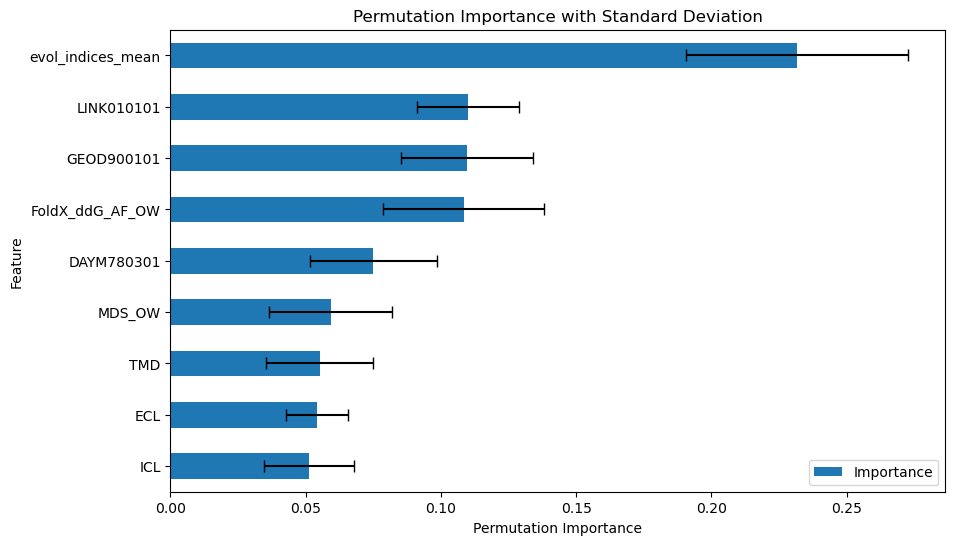

In [19]:
# Let's see the feature importance
from sklearn.inspection import permutation_importance

numerical_features_ = [x for x in RFE_features_LR_1 if x in numerical_features]
categorical_features_ = [x for x in RFE_features_LR_1 if x in categorical_features]

features_names = numerical_features_+categorical_features_

result = permutation_importance(first_classifier, X, y, n_repeats=10, random_state=42, scoring="f1")

feature_importance = pd.DataFrame({'Feature': features_names,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), xerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')
plt.savefig('1st_FeatureImportance.png', bbox_inches = "tight")
plt.show()


In [20]:
feature_importance.head()
feature_importance.to_excel("SourceFile_suppfig33_FI1.xlsx")

In [21]:
correlation_matrix = mct8.corr(method='spearman') # Spearman is better when the distribution is not normal
activity_correlation = correlation_matrix.iloc[0:1, 1:]
feat_positive_corr = activity_correlation[activity_correlation>0].dropna(axis=1).columns

In [22]:
feat_positive_corr

Index(['Expression', 'PMExpression', 'LongPosition', 'ICL', 'ECL',
       'MembraneFacing', 'MISA_OW', 'SASA_OW', 'MDS_OW', 'RMSD',
       ...
       'GIAG010101', 'DOSZ010101', 'KOSJ950114', 'MAESTRO_ddG_HM_OW',
       'MAESTRO_ddG_HM_IW', 'MAESTRO_ddG_AF_OW', 'MISA', 'SASA', 'MAESTRO_ddG',
       'dCOM'],
      dtype='object', length=110)

MDS_OW
GEOD900101
DAYM780301
LINK010101
FoldX_ddG_AF_OW
evol_indices_mean
TMD
ICL
ECL


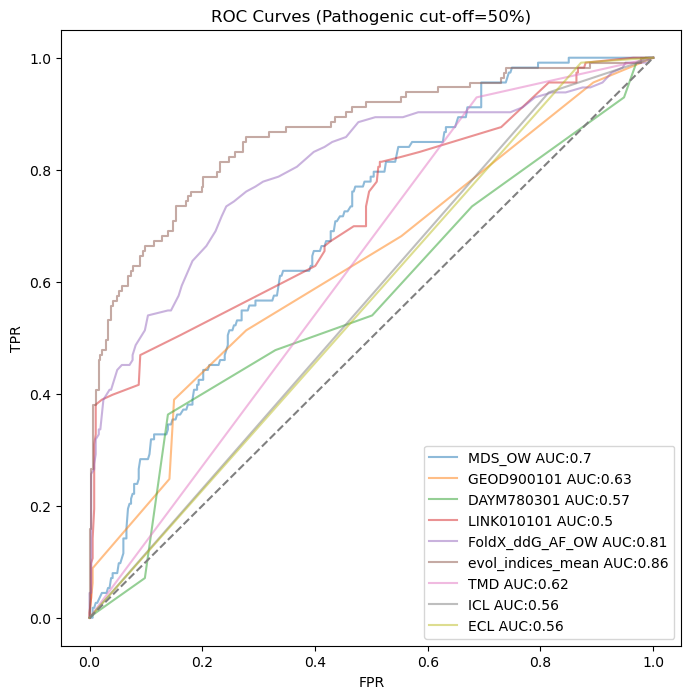

In [23]:
# I will compare the performance of the classifier in cross-validation vs features alones and other classifiers.
from sklearn.metrics import roc_curve, auc, roc_auc_score

mct8_rocs = mct8[mct8.index.isin(y.index)]
mct8_rocs['evol_indices_mean'].fillna(mct8_rocs['evol_indices_mean'].median(), inplace=True)

# ROC curves of features alones
fpr = {}
tpr = {}
thresholds = {}
roc_auc = {}
best_threshold = {}
plt.figure(figsize=(8, 8))
for i in RFE_features_LR_1:    
    print(i)
    if i in feat_positive_corr:
        fpr_i, tpr_i, thresholds_i = roc_curve(mct8_rocs['ClinSig'], -mct8_rocs[i].astype(float))
        roc_auc_i = roc_auc_score(mct8_rocs['ClinSig'], -mct8_rocs[i].astype(int))
        # Best Threshold by YoudenJ statistics
        youdenJ = tpr_i - fpr_i
        index = np.argmax(youdenJ)
        threshold_opt = round(thresholds_i[index], ndigits = 4)

        fpr[i] = fpr_i
        tpr[i] = tpr_i
        thresholds[i] = thresholds_i*-1
        roc_auc[i] = roc_auc_i
        best_threshold[i] = threshold_opt*-1
    else:
        fpr_i, tpr_i, thresholds_i = roc_curve(mct8_rocs['ClinSig'], mct8_rocs[i].astype(float))
        roc_auc_i = roc_auc_score(mct8_rocs['ClinSig'], mct8_rocs[i].astype(int))
        # Best Threshold by YoudenJ statistics
        youdenJ = tpr_i - fpr_i
        index = np.argmax(youdenJ)
        threshold_opt = round(thresholds_i[index], ndigits = 4)

        fpr[i] = fpr_i
        tpr[i] = tpr_i
        thresholds[i] = thresholds_i
        roc_auc[i] = roc_auc_i
        best_threshold[i] = threshold_opt
    
    plt.plot(fpr_i, tpr_i, label=i+' AUC:'+str(round(roc_auc_i, 2)), alpha=.5)

plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.title('ROC Curves (Pathogenic cut-off=50%)')
#plt.savefig('Pathogenic70_Prediction_ROCcurve.png')
plt.show()

In [24]:
best_threshold 

{'MDS_OW': 20.619,
 'GEOD900101': 6.0,
 'DAYM780301': -3.0,
 'LINK010101': 0.023,
 'FoldX_ddG_AF_OW': 2.2,
 'evol_indices_mean': 6.4153,
 'TMD': 1.0,
 'ICL': 0.0,
 'ECL': 0.0}

In [25]:
for i in best_threshold.keys():
    mct8[i+'_class'] = 0
    if i in feat_positive_corr:
        mct8.loc[mct8[i]<=best_threshold[i], i+'_class'] = 1
    else:
        mct8.loc[mct8[i]>=best_threshold[i], i+'_class'] = 1
    
    print(f'Accuracy', i,':', len(mct8[mct8['ClinSig'] == mct8[i+'_class']])/len(mct8))

Accuracy MDS_OW : 0.5854166666666667
Accuracy GEOD900101 : 0.7416666666666667
Accuracy DAYM780301 : 0.74375
Accuracy LINK010101 : 0.80625
Accuracy FoldX_ddG_AF_OW : 0.7520833333333333
Accuracy evol_indices_mean : 0.7958333333333333
Accuracy TMD : 0.4583333333333333
Accuracy ICL : 0.3625
Accuracy ECL : 0.33125


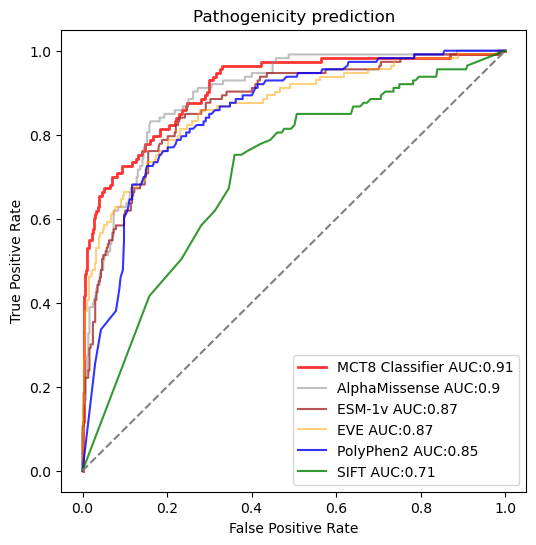

Classifier ROC auc splitting by variant:
Mean AUC: 0.91
Std AUC: 0.08


In [26]:
from sklearn.metrics import roc_curve, auc

# ROC curves 
mct8_predictors = pd.read_csv('mct8_predictors.csv', index_col=0)
mct8_predictors = mct8_predictors[mct8_predictors['AA_change'].isin(y.index)] # keep those that are in the classifier train set

mct8_predictors['ClinSig'] = 0
mct8_predictors.loc[mct8_predictors['Activity']<=50, 'ClinSig'] = 1

fpr_pp, tpr_pp, thresholds_pp = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.PolyPhen2_prob.astype(float))
roc_auc_pp = auc(fpr_pp, tpr_pp)

fpr_s, tpr_s, thresholds_s = roc_curve(mct8_predictors['ClinSig'], 1-mct8_predictors.SIFT_prob.astype(float))
roc_auc_s = auc(fpr_s, tpr_s)

fpr_am, tpr_am, thresholds_am = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.AM_prob.astype(float))
roc_auc_am = auc(fpr_am, tpr_am)

#mct8_gmvp = mct8_predictors.dropna()
#fpr_gmvp, tpr_gmvp, thresholds_gmvp = roc_curve(mct8_gmvp['ClinSig'], mct8_gmvp.gMVP_prob.astype(float))
#roc_auc_gmvp = auc(fpr_gmvp, tpr_gmvp)

fpr_esm1v, tpr_esm1v, thresholds_esm1v = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.ESM1v_prob.astype(float)*-1)
roc_auc_esm1v = auc(fpr_esm1v, tpr_esm1v)

fpr_eve_i, tpr_eve_i, thresholds_eve_i = roc_curve(mct8_rocs['ClinSig'], mct8_rocs.evol_indices_mean.astype(float))
roc_auc_eve_i = auc(fpr_eve_i, tpr_eve_i)


plt.figure(figsize=(6,6))

probas = cross_val_predict(first_classifier, X, y, method='predict_proba', n_jobs=-1, cv=10)
fpr, tpr, thresholds = roc_curve(y, probas[:,1])

scores_1 = cross_validate(first_classifier, X, y, n_jobs=-1, cv=10,
                        scoring=('accuracy', 'roc_auc'))  
plt.plot(fpr, tpr, label='MCT8 Classifier AUC:'+str(round(np.mean(scores_1['test_roc_auc']), 2)), 
         color='red', linewidth=2, alpha=.8)

#plt.plot(fpr_gmvp, tpr_gmvp, label='gMVP AUC:'+str(round(roc_auc_gmvp, 2)), color='purple', alpha=.8)
plt.plot(fpr_am, tpr_am, label='AlphaMissense AUC:'+str(round(roc_auc_am, 2)), color='grey', alpha=.5)
plt.plot(fpr_esm1v, tpr_esm1v, label='ESM-1v AUC:'+str(round(roc_auc_esm1v, 2)), color='brown', alpha=.8)
plt.plot(fpr_eve_i, tpr_eve_i, label='EVE AUC:'+str(round(roc_auc_eve_i, 2)), color='orange', alpha=.5)
plt.plot(fpr_pp, tpr_pp, label='PolyPhen2 AUC:'+str(round(roc_auc_pp, 2)), color='blue', alpha=.8)
plt.plot(fpr_s, tpr_s, label='SIFT AUC:'+str(round(roc_auc_s, 2)), color='green', alpha=.8)


plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Pathogenicity prediction')
plt.savefig('Step1_CO50_ROCcurve.png')
plt.show()

print("Classifier ROC auc splitting by variant:")
print(f"Mean AUC:", round(np.mean(scores_1["test_roc_auc"]), 2))
print(f"Std AUC:", round(np.std(scores_1["test_roc_auc"]), 2))

In [27]:
# Save source file
y_ = pd.DataFrame(y)
y_["classifier_prob"] = probas[:,1]
y_.reset_index(inplace=True)
y_.head()

mct8_rocs_ = mct8_rocs.reset_index()
#mct8_rocs_.head()

y_ = y_.merge(mct8_predictors[["AA_change", "PolyPhen2_prob", "SIFT_prob", "AM_prob", "ESM1v_prob"]], on="AA_change").merge(mct8_rocs_[["AA_change", "evol_indices_mean"]], on="AA_change")
y_.to_excel("SourceFile_fig4_roc1.xlsx")
y_.head()

,AA_change,ClinSig,classifier_prob,PolyPhen2_prob,SIFT_prob,AM_prob,ESM1v_prob,evol_indices_mean
0,Pro169Ala,0.0,0.039239,0.998,0.00,0.4379,-4.974,4.504437
1,Pro233Ala,1.0,0.174183,0.989,0.00,0.8787,-8.055,5.533997
2,Pro289Ala,0.0,0.219462,0.597,0.00,0.7903,-5.829,5.583874
3,Pro321Ala,0.0,0.270395,0.226,1.00,0.6264,-5.456,5.110223
4,Pro356Ala,0.0,0.088941,1.000,0.04,0.6461,-5.394,6.504669


In [28]:
mct8_classifier_prob = y.to_frame().reset_index()
mct8_classifier_prob["mct8_prob"] = probas[:,1]
mct8_classifier_prob = mct8_classifier_prob[["AA_change", "mct8_prob"]]
mct8_classifier_prob.head()

mct8_predictors.merge(mct8_classifier_prob, on="AA_change").to_csv("mct8_export_predictors_step1_all.csv")

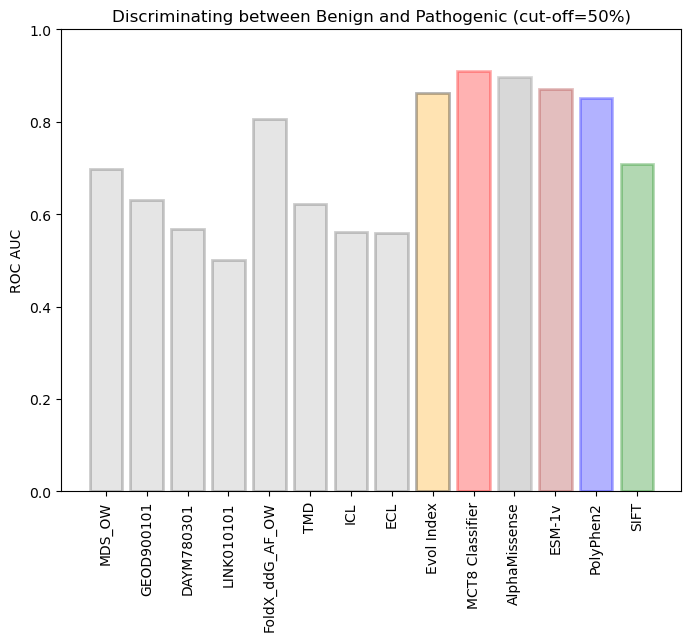

In [29]:
plt.figure(figsize=(8, 6))
for i in roc_auc.keys():
    if i != 'evol_indices_mean':
        plt.bar(i, roc_auc[i], color='grey', edgecolor='black', linewidth=2, alpha=0.2)

plt.bar('Evol Index', roc_auc['evol_indices_mean'], color='orange', alpha=0.3, edgecolor='black', linewidth=2)
plt.bar('MCT8 Classifier', np.mean(scores_1['test_roc_auc']), color='red', alpha=0.3, edgecolor='red', linewidth=2)
#plt.bar('gMVP', roc_auc_gmvp, color='purple', alpha=0.3, edgecolor='purple', linewidth=2)
plt.bar('AlphaMissense', roc_auc_am, color='grey', alpha=0.3, edgecolor='grey', linewidth=2)
plt.bar('ESM-1v', roc_auc_esm1v, color='brown', alpha=0.3, edgecolor='brown', linewidth=2)
plt.bar('PolyPhen2', roc_auc_pp, color='blue', alpha=0.3, edgecolor='blue', linewidth=2)
plt.bar('SIFT', roc_auc_s, color='green', alpha=0.3, edgecolor='green', linewidth=2)
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.ylabel('ROC AUC')
plt.title('Discriminating between Benign and Pathogenic (cut-off=50%)')
plt.savefig('Step1_CO50_AUCs.png')
plt.show()

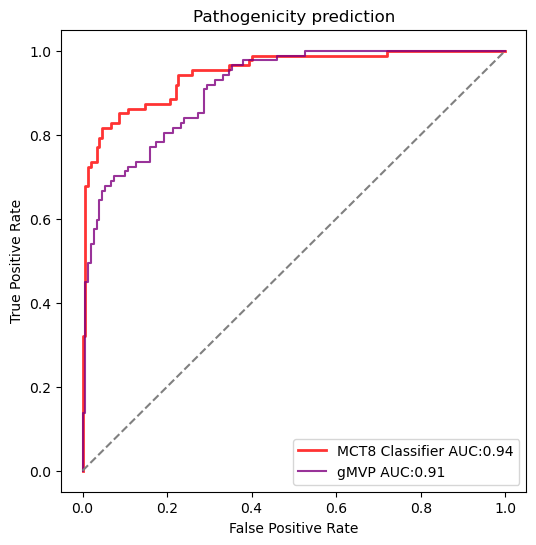

In [30]:
# The pre-scores of gMVP are for SNVs and doesn't include all possible missense
mct8_gmvp = mct8_predictors.dropna()
fpr_gmvp, tpr_gmvp, thresholds_gmvp = roc_curve(mct8_gmvp['ClinSig'], mct8_gmvp.gMVP_prob.astype(float))
roc_auc_gmvp = auc(fpr_gmvp, tpr_gmvp)

# Only subset of variants that are in the pre-calculated scores of gMVP
gmvp_subset = mct8_gmvp.AA_change.tolist()

y_gmvp = y.to_frame().reset_index()
index_gmvp = y_gmvp[y_gmvp.AA_change.isin(gmvp_subset)].index

plt.figure(figsize=(6,6))

probas = cross_val_predict(first_classifier, X[index_gmvp], y[index_gmvp], method='predict_proba', n_jobs=-1, cv=10)
fpr, tpr, thresholds = roc_curve(y[index_gmvp], probas[:,1])

scores_2 = cross_validate(first_classifier, X[index_gmvp], y[index_gmvp], n_jobs=-1, cv=10,
                        scoring=('accuracy', 'roc_auc'))  
plt.plot(fpr, tpr, label='MCT8 Classifier AUC:'+str(round(np.mean(scores_2['test_roc_auc']), 2)), 
         color='red', linewidth=2, alpha=.8)

plt.plot(fpr_gmvp, tpr_gmvp, label='gMVP AUC:'+str(round(roc_auc_gmvp, 2)), color='purple', alpha=.8)

plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Pathogenicity prediction')
plt.savefig('Step1_CO50_ROCcurve_gMVPsubset.png')
plt.show()

In [31]:
mct8_gmvp.shape

(237, 12)

In [32]:
mct8_classifier_prob = y[index_gmvp].to_frame().reset_index()
mct8_classifier_prob["mct8_prob"] = probas[:,1]
mct8_classifier_prob = mct8_classifier_prob[["AA_change", "mct8_prob"]]
mct8_classifier_prob.head()

print(mct8_classifier_prob.shape)

mct8_gmvp.merge(mct8_classifier_prob, on="AA_change").to_csv("mct8_export_predictors_step1_gMVP.csv")

(237, 2)


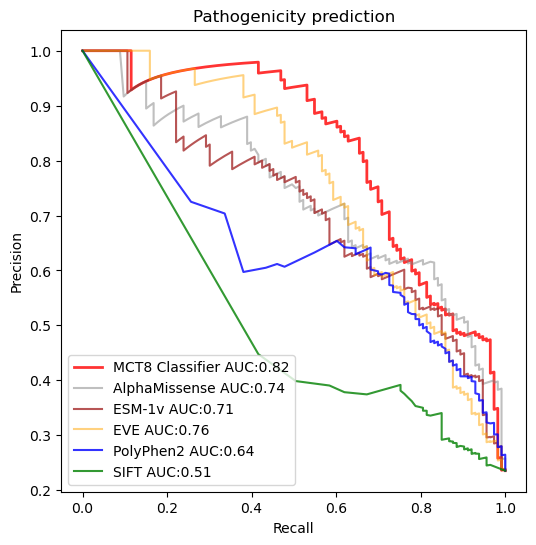

In [33]:
from sklearn.metrics import precision_recall_curve

# PRC curves
mct8_predictors = pd.read_csv('mct8_predictors.csv', index_col=0)
mct8_predictors = mct8_predictors[mct8_predictors['AA_change'].isin(y.index)] # keep those that are in the classifier train set

mct8_predictors['ClinSig'] = 0
mct8_predictors.loc[mct8_predictors['Activity']<=50, 'ClinSig'] = 1

precision_pp, recall_pp, thresholds_pp = precision_recall_curve(mct8_predictors['ClinSig'], mct8_predictors.PolyPhen2_prob.astype(float))
prc_auc_pp = auc(recall_pp, precision_pp)

precision_s, recall_s, thresholds_s = precision_recall_curve(mct8_predictors['ClinSig'], 1-mct8_predictors.SIFT_prob.astype(float))
prc_auc_s = auc(recall_s, precision_s)

precision_am, recall_am, thresholds_am = precision_recall_curve(mct8_predictors['ClinSig'], mct8_predictors.AM_prob.astype(float))
prc_auc_am = auc(recall_am, precision_am)

#mct8_gmvp = mct8_predictors.dropna()
#precision_gmvp, recall_gmvp, thresholds_gmvp = precision_recall_curve(mct8_gmvp['ClinSig'], mct8_gmvp.gMVP_prob.astype(float))
#prc_auc_gmvp = auc(recall_gmvp, precision_gmvp)

precision_esm1v, recall_esm1v, thresholds_esm1v = precision_recall_curve(mct8_predictors['ClinSig'], mct8_predictors.ESM1v_prob.astype(float)*-1)
prc_auc_esm1v = auc(recall_esm1v, precision_esm1v)

precision_eve_i, recall_eve_i, thresholds_eve_i = precision_recall_curve(mct8_rocs['ClinSig'], mct8_rocs.evol_indices_mean.astype(float))
prc_auc_eve_i = auc(recall_eve_i, precision_eve_i)


plt.figure(figsize=(6,6))

probas = cross_val_predict(first_classifier, X, y, method='predict_proba', n_jobs=-1, cv=10)
precision, recall, thresholds = precision_recall_curve(y, probas[:,1])
prc_auc_classifier = auc(recall, precision)

plt.plot(recall, precision, label='MCT8 Classifier AUC:'+str(round(prc_auc_classifier, 2)), 
         color='red', linewidth=2, alpha=.8)

#plt.plot(recall_gmvp, precision_gmvp, label='gMVP AUC:'+str(round(prc_auc_gmvp, 2)), color='purple', alpha=.8)
plt.plot(recall_am, precision_am, label='AlphaMissense AUC:'+str(round(prc_auc_am, 2)), color='grey', alpha=.5)
plt.plot(recall_esm1v, precision_esm1v, label='ESM-1v AUC:'+str(round(prc_auc_esm1v, 2)), color='brown', alpha=.8)
plt.plot(recall_eve_i, precision_eve_i, label='EVE AUC:'+str(round(prc_auc_eve_i, 2)), color='orange', alpha=.5)
plt.plot(recall_pp, precision_pp, label='PolyPhen2 AUC:'+str(round(prc_auc_pp, 2)), color='blue', alpha=.8)
plt.plot(recall_s, precision_s, label='SIFT AUC:'+str(round(prc_auc_s, 2)), color='green', alpha=.8)


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.title('Pathogenicity prediction')
plt.savefig('Step1_CO50_PRCcurve.png')
plt.show()

In [34]:
classifier_50_accuracy = round(accuracy_score(mct8_rocs['ClinSig'].astype(int), np.where(probas[:, 1]>0.5, 1, 0)), 2)
classifier_50_precision = round(precision_score(mct8_rocs['ClinSig'].astype(int), np.where(probas[:, 1]>0.5, 1, 0)), 2)
classifier_50_recall = round(recall_score(mct8_rocs['ClinSig'].astype(int), np.where(probas[:, 1]>0.5, 1, 0)), 2)

mct8_polyphen2 = mct8_predictors
mct8_polyphen2 = mct8_polyphen2[['AA_change', 'ClinSig', 'PolyPhen2_prob', 'PolyPhen2_pred']]
mct8_polyphen2.loc[mct8_polyphen2['PolyPhen2_prob']>0.908, 'PolyPhen2_pred'] = 1
mct8_polyphen2.loc[mct8_polyphen2['PolyPhen2_prob']<=0.446, 'PolyPhen2_pred'] = 0

mct8_polyphen2.drop(mct8_polyphen2[(mct8_polyphen2['PolyPhen2_prob']<=0.908) & (mct8_polyphen2['PolyPhen2_prob']>0.446)].index, inplace=True)

polyphen_accuracy = round(accuracy_score(mct8_polyphen2['ClinSig'].astype(int), mct8_polyphen2['PolyPhen2_pred'].astype(int)), 2)
polyphen_precision = round(precision_score(mct8_polyphen2['ClinSig'].astype(int), mct8_polyphen2['PolyPhen2_pred'].astype(int)), 2)
polyphen_recall = round(recall_score(mct8_polyphen2['ClinSig'].astype(int), mct8_polyphen2['PolyPhen2_pred'].astype(int)), 2)

sift_accuracy = round(accuracy_score(mct8_predictors['ClinSig'].astype(int), mct8_predictors['SIFT_pred'].astype(int)), 2)
sift_precision = round(precision_score(mct8_predictors['ClinSig'].astype(int), mct8_predictors['SIFT_pred'].astype(int)), 2)
sift_recall = round(recall_score(mct8_predictors['ClinSig'].astype(int), mct8_predictors['SIFT_pred'].astype(int)), 2)

mct8_am = mct8_predictors[["AA_change", "AM_prob", "AM_pred", "ClinSig"]]
mct8_am.loc[mct8_am.AM_pred == "pathogenic", "AM_pred_2"] = 1
mct8_am.loc[mct8_am.AM_pred == "benign", "AM_pred_2"] = 0
mct8_am = mct8_am.dropna()
alphamissense_accuracy = round(accuracy_score(mct8_am['ClinSig'].astype(int), mct8_am['AM_pred_2'].astype(int)), 2)
alphamissense_precision = round(precision_score(mct8_am['ClinSig'].astype(int), mct8_am['AM_pred_2'].astype(int)), 2)
alphamissense_recall = round(recall_score(mct8_am['ClinSig'].astype(int), mct8_am['AM_pred_2'].astype(int)), 2)


print('Performance of classifiers for discriminating between Benign and Pathogenic (cut-off=50%):')
print('MCT8 Classifier (CV)')
print('Accuracy:', classifier_50_accuracy)
print('Precision:', classifier_50_precision)
print('Recall:', classifier_50_recall)
print('PolyPhen2:')
print(f'Accuracy:', polyphen_accuracy)
print(f'Precision:', polyphen_precision)
print(f'Recall:', polyphen_recall)
print('SIFT:')
print(f'Accuracy:', sift_accuracy)
print(f'Precision:', sift_precision)
print(f'Recall:', sift_recall)
print('Alphamissense:')
print(f'Accuracy:', alphamissense_accuracy)
print(f'Precision:', alphamissense_precision)
print(f'Recall:', alphamissense_recall)

Performance of classifiers for discriminating between Benign and Pathogenic (cut-off=50%):
MCT8 Classifier (CV)
Accuracy: 0.89
Precision: 0.82
Recall: 0.66
PolyPhen2:
Accuracy: 0.77
Precision: 0.52
Recall: 0.9
SIFT:
Accuracy: 0.67
Precision: 0.39
Recall: 0.75
Alphamissense:
Accuracy: 0.66
Precision: 0.43
Recall: 0.99


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6892\2357190876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mct8_polyphen2.drop(mct8_polyphen2[(mct8_polyphen2['PolyPhen2_prob']<=0.908) & (mct8_polyphen2['PolyPhen2_prob']>0.446)].index, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6892\2357190876.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mct8_am.loc[mct8_am.AM_pred == "pathogenic", "AM_pred_2"] = 1


In [35]:
# AlphaMissense has high recall. Is it overpredicting pathogenicity?
print(f"Variants Predicted as Pathogenic (out of 480 variants):", mct8_am[mct8_am['AM_pred_2']==1].shape[0])
print(f"Percantage of the dataset:", round(mct8_am[mct8_am['AM_pred_2']==1].shape[0]/480*100, 2))
print(f"The dataset contains", mct8_am[mct8_am['ClinSig']==1].shape[0], "pathogenic variants (", round(mct8_am[mct8_am['ClinSig']==1].shape[0]/480*100,2), "%)")

Variants Predicted as Pathogenic (out of 480 variants): 243
Percantage of the dataset: 50.62
The dataset contains 106 pathogenic variants ( 22.08 %)


---
Let's see if the classifier is "memorizing" conserved sites. 
For evaluating this, splitting the dataset per position rather than variant is needed

In [36]:
# Get the variants positions
variants_positions = y.reset_index()
variants_positions["Position"] = variants_positions.AA_change.str[3:-3].tolist()
variants_positions.head()

,AA_change,ClinSig,Position
0,Pro169Ala,0.0,169
1,Pro233Ala,1.0,233
2,Pro289Ala,0.0,289
3,Pro321Ala,0.0,321
4,Pro356Ala,0.0,356


In [37]:
# Count ocurrences of variants per position
from collections import Counter
ocurrences = Counter(variants_positions.Position)
sorted(ocurrences.items(), key=lambda x:x[1], reverse=True)

[('192', 5),
 ('271', 5),
 ('445', 5),
 ('441', 4),
 ('224', 4),
 ('453', 4),
 ('196', 3),
 ('282', 3),
 ('295', 3),
 ('401', 3),
 ('564', 3),
 ('298', 3),
 ('235', 3),
 ('519', 3),
 ('188', 3),
 ('203', 3),
 ('291', 3),
 ('304', 3),
 ('433', 3),
 ('471', 3),
 ('354', 3),
 ('498', 3),
 ('289', 2),
 ('321', 2),
 ('537', 2),
 ('221', 2),
 ('251', 2),
 ('276', 2),
 ('303', 2),
 ('307', 2),
 ('312', 2),
 ('449', 2),
 ('499', 2),
 ('527', 2),
 ('536', 2),
 ('541', 2),
 ('558', 2),
 ('398', 2),
 ('346', 2),
 ('489', 2),
 ('239', 2),
 ('283', 2),
 ('491', 2),
 ('193', 2),
 ('306', 2),
 ('194', 2),
 ('232', 2),
 ('290', 2),
 ('313', 2),
 ('360', 2),
 ('366', 2),
 ('586', 2),
 ('587', 2),
 ('575', 2),
 ('349', 2),
 ('357', 2),
 ('434', 2),
 ('469', 2),
 ('487', 2),
 ('492', 2),
 ('494', 2),
 ('512', 2),
 ('543', 2),
 ('568', 2),
 ('297', 2),
 ('227', 2),
 ('476', 2),
 ('300', 2),
 ('301', 2),
 ('388', 2),
 ('212', 2),
 ('286', 2),
 ('252', 2),
 ('553', 2),
 ('169', 1),
 ('233', 1),
 ('356', 1),

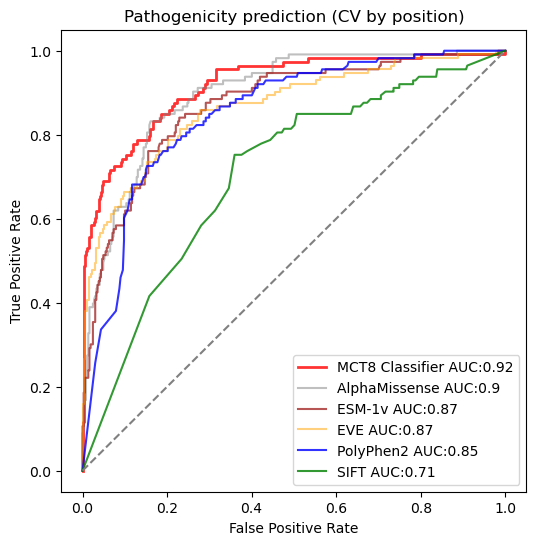

In [38]:
from sklearn.model_selection import GroupKFold

# ROC curves 
mct8_predictors = pd.read_csv('mct8_predictors.csv', index_col=0)
mct8_predictors = mct8_predictors[mct8_predictors['AA_change'].isin(y.index)] # keep those that are in the classifier train set

mct8_predictors['ClinSig'] = 0
mct8_predictors.loc[mct8_predictors['Activity']<=50, 'ClinSig'] = 1

fpr_pp, tpr_pp, thresholds_pp = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.PolyPhen2_prob.astype(float))
roc_auc_pp = auc(fpr_pp, tpr_pp)

fpr_s, tpr_s, thresholds_s = roc_curve(mct8_predictors['ClinSig'], 1-mct8_predictors.SIFT_prob.astype(float))
roc_auc_s = auc(fpr_s, tpr_s)

fpr_am, tpr_am, thresholds_am = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.AM_prob.astype(float))
roc_auc_am = auc(fpr_am, tpr_am)

#mct8_gmvp = mct8_predictors.dropna()
#fpr_gmvp, tpr_gmvp, thresholds_gmvp = roc_curve(mct8_gmvp['ClinSig'], mct8_gmvp.gMVP_prob.astype(float))
#roc_auc_gmvp = auc(fpr_gmvp, tpr_gmvp)

fpr_esm1v, tpr_esm1v, thresholds_esm1v = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.ESM1v_prob.astype(float)*-1)
roc_auc_esm1v = auc(fpr_esm1v, tpr_esm1v)

fpr_eve_i, tpr_eve_i, thresholds_eve_i = roc_curve(mct8_rocs['ClinSig'], mct8_rocs.evol_indices_mean.astype(float))
roc_auc_eve_i = auc(fpr_eve_i, tpr_eve_i)


plt.figure(figsize=(6,6))

probas = cross_val_predict(first_classifier, X, y, method='predict_proba', n_jobs=-1, cv=GroupKFold(n_splits=10),
                           groups=variants_positions.Position.tolist())
fpr, tpr, thresholds = roc_curve(y, probas[:,1])

scores_positions = cross_validate(first_classifier, X, y, n_jobs=-1, cv=GroupKFold(n_splits=10),
                        groups=variants_positions.Position.tolist(), scoring=('accuracy', 'roc_auc'))  
plt.plot(fpr, tpr, label='MCT8 Classifier AUC:'+str(round(np.mean(scores_positions['test_roc_auc']), 2)), 
         color='red', linewidth=2, alpha=.8)

#plt.plot(fpr_gmvp, tpr_gmvp, label='gMVP AUC:'+str(round(roc_auc_gmvp, 2)), color='purple', alpha=.8)
plt.plot(fpr_am, tpr_am, label='AlphaMissense AUC:'+str(round(roc_auc_am, 2)), color='grey', alpha=.5)
plt.plot(fpr_esm1v, tpr_esm1v, label='ESM-1v AUC:'+str(round(roc_auc_esm1v, 2)), color='brown', alpha=.8)
plt.plot(fpr_eve_i, tpr_eve_i, label='EVE AUC:'+str(round(roc_auc_eve_i, 2)), color='orange', alpha=.5)
plt.plot(fpr_pp, tpr_pp, label='PolyPhen2 AUC:'+str(round(roc_auc_pp, 2)), color='blue', alpha=.8)
plt.plot(fpr_s, tpr_s, label='SIFT AUC:'+str(round(roc_auc_s, 2)), color='green', alpha=.8)


plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Pathogenicity prediction (CV by position)')
plt.savefig('Step1_CO50_ROCcurve_splitpositions.png')
plt.show()

In [39]:
# Save source file
y_ = pd.DataFrame(y)
y_["classifier_prob"] = probas[:,1]
y_.reset_index(inplace=True)
y_.head()

mct8_rocs_ = mct8_rocs.reset_index()

y_ = y_.merge(mct8_predictors[["AA_change", "PolyPhen2_prob", "SIFT_prob", "AM_prob", "ESM1v_prob"]], on="AA_change").merge(mct8_rocs_[["AA_change", "evol_indices_mean"]], on="AA_change")
y_.to_excel("SourceFile_suppfig32_roc1.xlsx")
y_.head()

,AA_change,ClinSig,classifier_prob,PolyPhen2_prob,SIFT_prob,AM_prob,ESM1v_prob,evol_indices_mean
0,Pro169Ala,0.0,0.044789,0.998,0.00,0.4379,-4.974,4.504437
1,Pro233Ala,1.0,0.202562,0.989,0.00,0.8787,-8.055,5.533997
2,Pro289Ala,0.0,0.188015,0.597,0.00,0.7903,-5.829,5.583874
3,Pro321Ala,0.0,0.284019,0.226,1.00,0.6264,-5.456,5.110223
4,Pro356Ala,0.0,0.094322,1.000,0.04,0.6461,-5.394,6.504669


In [40]:
scores_positions = cross_validate(first_classifier, X, y, n_jobs=-1, cv=GroupKFold(n_splits=10),
                                  groups=variants_positions.Position.tolist(),
                                  scoring=('accuracy', 'roc_auc'))  

# The positions are splitted in the training and testing set correctly
print("Classifier ROC auc splitting by position:")
print(f"Mean AUC:", round(np.mean(scores_positions["test_roc_auc"]), 2))
print(f"Std AUC:", round(np.std(scores_positions["test_roc_auc"]), 2))

print("Classifier ROC auc splitting by variant:")
print(f"Mean AUC:", round(np.mean(scores_1["test_roc_auc"]), 2))
print(f"Std AUC:", round(np.std(scores_1["test_roc_auc"]), 2))

Classifier ROC auc splitting by position:
Mean AUC: 0.92
Std AUC: 0.06
Classifier ROC auc splitting by variant:
Mean AUC: 0.91
Std AUC: 0.08


---
Let's see how the classifiers perform in discrimnatingsevere pathogenic variants (activity <= 10%) vs benign (activity>50%)

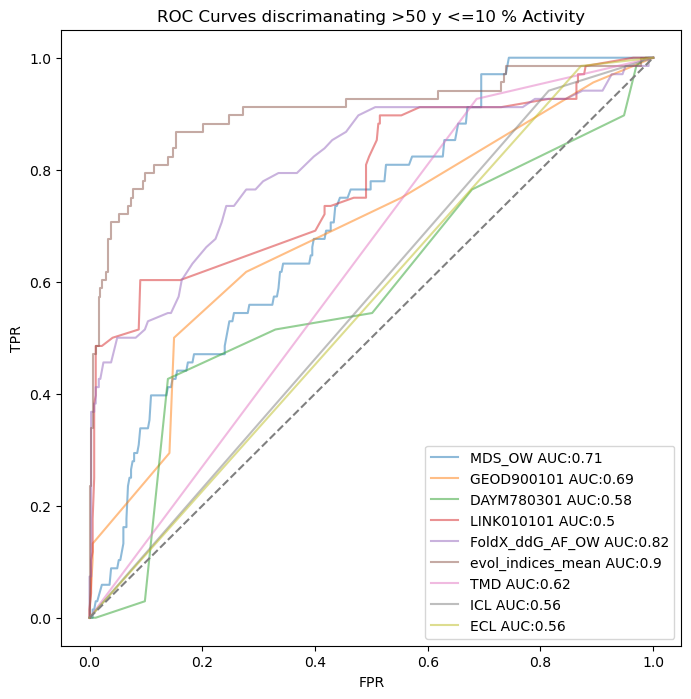

In [41]:
# I will compare the performance of the classifier in cross-validation vs features alones and other classifiers.
from sklearn.metrics import roc_curve, auc, roc_auc_score

mct8_rocs = mct8[mct8.index.isin(y.index)]
mct8_rocs['evol_indices_mean'].fillna(mct8_rocs['evol_indices_mean'].median(), inplace=True)
mct8_rocs = mct8_rocs[(mct8_rocs.Activity>50) | (mct8_rocs.Activity<=10)]


# ROC curves of features alones
fpr = {}
tpr = {}
roc_auc = {}
plt.figure(figsize=(8, 8))
for i in RFE_features_LR_1:    
    if i in feat_positive_corr:
        fpr_i, tpr_i, thresholds_i = roc_curve(mct8_rocs['ClinSig'], -mct8_rocs[i].astype(float))
        roc_auc_i = roc_auc_score(mct8_rocs['ClinSig'], -mct8_rocs[i].astype(int))
    else:
        fpr_i, tpr_i, thresholds_i = roc_curve(mct8_rocs['ClinSig'], mct8_rocs[i].astype(float))
        roc_auc_i = roc_auc_score(mct8_rocs['ClinSig'], mct8_rocs[i].astype(int))
    fpr[i] = fpr_i
    tpr[i] = tpr_i
    roc_auc[i] = roc_auc_i
    
    plt.plot(fpr_i, tpr_i, label=i+' AUC:'+str(round(roc_auc_i, 2)), alpha=.5)

plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.title('ROC Curves discrimanating >50 y <=10 % Activity')
#plt.savefig('Pathogenic70_Prediction_ROCcurve.png')
plt.show()

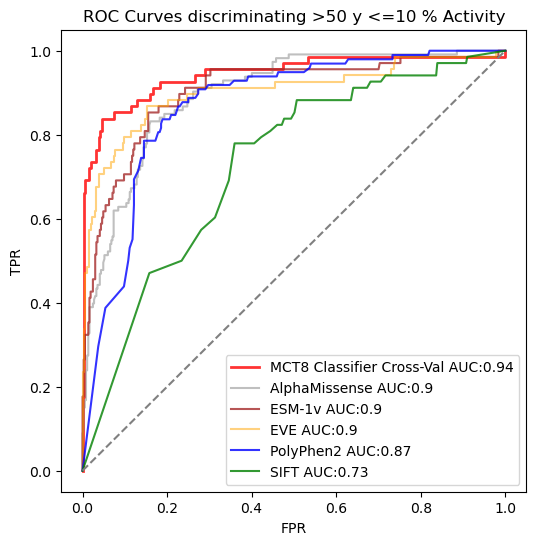

In [42]:
from sklearn.metrics import roc_curve, auc

# ROC curves of other classifiers
mct8_predictors = pd.read_csv('mct8_predictors.csv', index_col=0)
mct8_predictors = mct8_predictors[mct8_predictors['AA_change'].isin(y.index)] # keep those that are in the classifier train set

mct8_predictors = mct8_predictors[(mct8_predictors.Activity>50) | (mct8_predictors.Activity<=10)]
mct8_predictors['ClinSig'] = 0
mct8_predictors.loc[mct8_predictors['Activity']<=10, 'ClinSig'] = 1

fpr_pp, tpr_pp, thresholds_pp = roc_curve(mct8_polyphen2['ClinSig'], mct8_polyphen2.PolyPhen2_prob.astype(float))
roc_auc_pp = auc(fpr_pp, tpr_pp)

fpr_s, tpr_s, thresholds_s = roc_curve(mct8_predictors['ClinSig'], 1-mct8_predictors.SIFT_prob.astype(float))
roc_auc_s = auc(fpr_s, tpr_s)

#mct8_gmvp = mct8_predictors.dropna()
#fpr_gmvp, tpr_gmvp, thresholds_gmvp = roc_curve(mct8_gmvp['ClinSig'], mct8_gmvp.gMVP_prob.astype(float))
#roc_auc_gmvp = auc(fpr_gmvp, tpr_gmvp)

fpr_esm1v, tpr_esm1v, thresholds_esm1v = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.ESM1v_prob.astype(float)*-1)
roc_auc_esm1v = auc(fpr_esm1v, tpr_esm1v)

fpr_eve_i, tpr_eve_i, thresholds_eve_i = roc_curve(mct8_rocs['ClinSig'], mct8_rocs.evol_indices_mean.astype(float))
roc_auc_eve_i = auc(fpr_eve_i, tpr_eve_i)


plt.figure(figsize=(6,6))

rocs_10 = mct8.reset_index()
list_rocs_10 = rocs_10[(rocs_10.Activity>50) | (rocs_10.Activity<=10)].index.tolist()

probas_10 = probas[list_rocs_10]

fpr, tpr, thresholds = roc_curve(mct8_rocs.ClinSig, probas_10[:,1])
roc_auc_10 = roc_auc_score(mct8_rocs['ClinSig'], probas_10[:,1])
 
plt.plot(fpr, tpr, label='MCT8 Classifier Cross-Val AUC:'+str(round(roc_auc_10, 2)), 
         color='red', linewidth=2, alpha=.8)

#plt.plot(fpr_gmvp, tpr_gmvp, label='gMVP AUC:'+str(round(roc_auc_gmvp, 2)), color='purple', alpha=.8)
plt.plot(fpr_am, tpr_am, label='AlphaMissense AUC:'+str(round(roc_auc_am, 2)), color='grey', alpha=.5)
plt.plot(fpr_esm1v, tpr_esm1v, label='ESM-1v AUC:'+str(round(roc_auc_esm1v, 2)), color='brown', alpha=.8)
plt.plot(fpr_eve_i, tpr_eve_i, label='EVE AUC:'+str(round(roc_auc_eve_i, 2)), color='orange', alpha=.5)
plt.plot(fpr_pp, tpr_pp, label='PolyPhen2 AUC:'+str(round(roc_auc_pp, 2)), color='blue', alpha=.8)
plt.plot(fpr_s, tpr_s, label='SIFT AUC:'+str(round(roc_auc_s, 2)), color='green', alpha=.8)


plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.title('ROC Curves discriminating >50 y <=10 % Activity')
plt.savefig('Step1_CO10_ROCcurve.png')
plt.show()

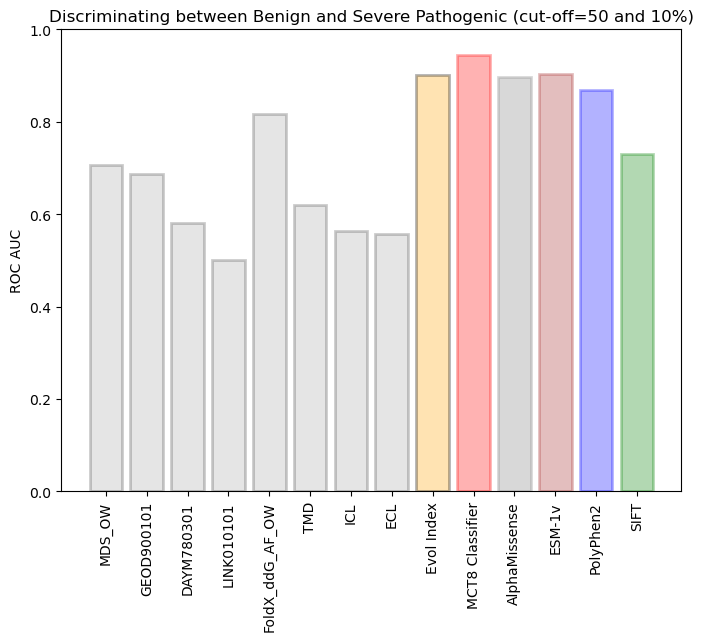

In [43]:
plt.figure(figsize=(8, 6))
for i in roc_auc.keys():
    if i != 'evol_indices_mean':
        plt.bar(i, roc_auc[i], color='grey', edgecolor='black', linewidth=2, alpha=0.2)

plt.bar('Evol Index', roc_auc['evol_indices_mean'], color='orange', alpha=0.3, edgecolor='black', linewidth=2)
plt.bar('MCT8 Classifier', roc_auc_10, color='red', alpha=0.3, edgecolor='red', linewidth=2)
#plt.bar('gMVP', roc_auc_gmvp, color='purple', alpha=0.3, edgecolor='purple', linewidth=2)
plt.bar('AlphaMissense', roc_auc_am, color='grey', alpha=0.3, edgecolor='grey', linewidth=2)
plt.bar('ESM-1v', roc_auc_esm1v, color='brown', alpha=0.3, edgecolor='brown', linewidth=2)
plt.bar('PolyPhen2', roc_auc_pp, color='blue', alpha=0.3, edgecolor='blue', linewidth=2)
plt.bar('SIFT', roc_auc_s, color='green', alpha=0.3, edgecolor='green', linewidth=2)
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.ylabel('ROC AUC')
plt.title('Discriminating between Benign and Severe Pathogenic (cut-off=50 and 10%)')
plt.savefig('Step1_CO10_AUCs.png')
plt.show()

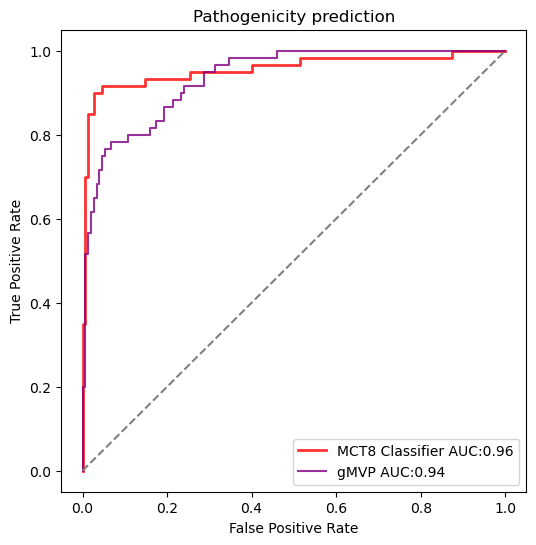

In [44]:
# The pre-scores of gMVP are for SNVs and doesn't include all possible missense
mct8_gmvp = mct8_predictors.dropna()
fpr_gmvp, tpr_gmvp, thresholds_gmvp = roc_curve(mct8_gmvp['ClinSig'], mct8_gmvp.gMVP_prob.astype(float))
roc_auc_gmvp = auc(fpr_gmvp, tpr_gmvp)

# Only subset of variants that are in the pre-calculated scores of gMVP
gmvp_subset = mct8_gmvp.AA_change.tolist()

y_gmvp = y.to_frame().reset_index()
index_gmvp = y_gmvp[y_gmvp.AA_change.isin(gmvp_subset)].index

plt.figure(figsize=(6,6))

probas = cross_val_predict(first_classifier, X[index_gmvp], y[index_gmvp], method='predict_proba', n_jobs=-1, cv=10)
fpr, tpr, thresholds = roc_curve(y[index_gmvp], probas[:,1])

scores = cross_validate(first_classifier, X[index_gmvp], y[index_gmvp], n_jobs=-1, cv=10,
                        scoring=('accuracy', 'roc_auc'))  
plt.plot(fpr, tpr, label='MCT8 Classifier AUC:'+str(round(np.mean(scores['test_roc_auc']), 2)), 
         color='red', linewidth=2, alpha=.8)

plt.plot(fpr_gmvp, tpr_gmvp, label='gMVP AUC:'+str(round(roc_auc_gmvp, 2)), color='purple', alpha=.8)

plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Pathogenicity prediction')
plt.savefig('Step1_CO10_ROCcurve_gMVPsubset.png')
plt.show()

In [45]:
classifier_10_accuracy = round(accuracy_score(mct8_rocs['ClinSig'].astype(int), np.where(probas_10[:, 1]>0.5, 1, 0)), 2)
classifier_10_precision = round(precision_score(mct8_rocs['ClinSig'].astype(int), np.where(probas_10[:, 1]>0.5, 1, 0)), 2)
classifier_10_recall = round(recall_score(mct8_rocs['ClinSig'].astype(int), np.where(probas_10[:, 1]>0.5, 1, 0)), 2)

mct8_polyphen2 = mct8_predictors.dropna()
mct8_polyphen2 = mct8_polyphen2[['AA_change','ClinSig', 'PolyPhen2_prob', 'PolyPhen2_pred']]
mct8_polyphen2.loc[mct8_polyphen2['PolyPhen2_prob']>0.908, 'PolyPhen2_pred'] = 1
mct8_polyphen2.loc[mct8_polyphen2['PolyPhen2_prob']<=0.446, 'PolyPhen2_pred'] = 0

mct8_polyphen2.drop(mct8_polyphen2[(mct8_polyphen2['PolyPhen2_prob']<=0.908) & (mct8_polyphen2['PolyPhen2_prob']>0.446)].index, inplace=True)
polyphen_accuracy = round(accuracy_score(mct8_polyphen2['ClinSig'].astype(int), mct8_polyphen2['PolyPhen2_pred'].astype(int)), 2)
polyphen_precision = round(precision_score(mct8_polyphen2['ClinSig'].astype(int), mct8_polyphen2['PolyPhen2_pred'].astype(int)), 2)
polyphen_recall = round(recall_score(mct8_polyphen2['ClinSig'].astype(int), mct8_polyphen2['PolyPhen2_pred'].astype(int)), 2)

sift_accuracy = round(accuracy_score(mct8_predictors['ClinSig'].astype(int), mct8_predictors['SIFT_pred'].astype(int)), 2)
sift_precision = round(precision_score(mct8_predictors['ClinSig'].astype(int), mct8_predictors['SIFT_pred'].astype(int)), 2)
sift_recall = round(recall_score(mct8_predictors['ClinSig'].astype(int), mct8_predictors['SIFT_pred'].astype(int)), 2)

mct8_am = mct8_predictors[["AA_change", "AM_prob", "AM_pred", "ClinSig"]]
mct8_am.loc[mct8_am.AM_pred == "pathogenic", "AM_pred_2"] = 1
mct8_am.loc[mct8_am.AM_pred == "benign", "AM_pred_2"] = 0
mct8_am = mct8_am.dropna()
alphamissense_accuracy = round(accuracy_score(mct8_am['ClinSig'].astype(int), mct8_am['AM_pred_2'].astype(int)), 2)
alphamissense_precision = round(precision_score(mct8_am['ClinSig'].astype(int), mct8_am['AM_pred_2'].astype(int)), 2)
alphamissense_recall = round(recall_score(mct8_am['ClinSig'].astype(int), mct8_am['AM_pred_2'].astype(int)), 2)

print('Performance of classifiers for discriminating between Benign and Severe Pathogenic (cut-off=75 and 10%):')
print('MCT8 Classifier (CV)')
print(f'Accuracy: ', classifier_10_accuracy)
print(f'Precision: ', classifier_10_precision)
print(f'Recall: ', classifier_10_recall)
print('PolyPhen2:')
print(f'Accuracy:', polyphen_accuracy)
print(f'Precision:', polyphen_precision)
print(f'Recall:', polyphen_recall)
print('SIFT:')
print(f'Accuracy:', sift_accuracy)
print(f'Precision:', sift_precision)
print(f'Recall:', sift_recall)
print('Alphamissense:')
print(f'Accuracy:', alphamissense_accuracy)
print(f'Precision:', alphamissense_precision)
print(f'Recall:', alphamissense_recall)

Performance of classifiers for discriminating between Benign and Severe Pathogenic (cut-off=75 and 10%):
MCT8 Classifier (CV)
Accuracy:  0.93
Precision:  0.77
Recall:  0.81
PolyPhen2:
Accuracy: 0.78
Precision: 0.58
Recall: 0.95
SIFT:
Accuracy: 0.66
Precision: 0.29
Recall: 0.78
Alphamissense:
Accuracy: 0.62
Precision: 0.32
Recall: 0.98


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6892\1457953121.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mct8_am.loc[mct8_am.AM_pred == "pathogenic", "AM_pred_2"] = 1


In [46]:
mct8_am.shape

(366, 5)

In [47]:
# AlphaMissense has high recall. Is it overpredicting pathogenicity?
print(f"Variants Predicted as Pathogenic (out of 366 variants):", mct8_am[mct8_am['AM_pred_2']==1].shape[0])
print(f"Percantage of the dataset:", round(mct8_am[mct8_am['AM_pred_2']==1].shape[0]/366*100, 2))
print(f"The dataset contains", mct8_am[mct8_am['ClinSig']==1].shape[0], "pathogenic variants (", round(mct8_am[mct8_am['ClinSig']==1].shape[0]/366*100,2), "%)")

Variants Predicted as Pathogenic (out of 366 variants): 203
Percantage of the dataset: 55.46
The dataset contains 66 pathogenic variants ( 18.03 %)


---
### Second step

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mct8 = pd.read_csv('MCT8_IA_dataset_T4.csv', index_col=0)
mct8.set_index('AA_change', inplace=True)

In [49]:
# Defining two different Classes
mct8 = mct8[mct8.Activity <=50]
mct8.loc[(mct8['Activity'] > 10), 'ClinSig'] = 0
mct8.loc[mct8['Activity'] <= 10, 'ClinSig'] = 1

In [50]:
# Defining the datasets
features = [x for x in mct8.columns if x not in ['Activity', 'Expression', 'PMExpression', 'LongPosition', 'ClinSig']]
X = mct8.loc[:, features]
y = mct8['ClinSig']

categorical_features = ['TMD', 'ICL', 'ECL', 'MembraneFacing', 'ChannelFacing', 'Buried',
                        'SubstrateInteraction', 'OSIR', 'TMDbinder', 'HelixStructure', 'LoopConformation']
numerical_features = [x for x in X.columns if x not in categorical_features]

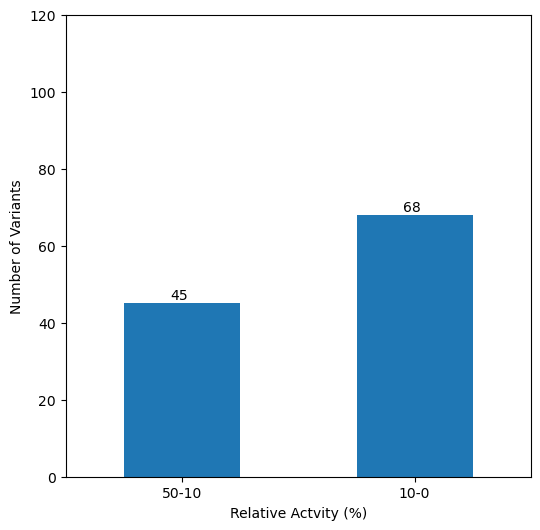

In [51]:
y.reset_index().groupby('ClinSig')['AA_change'].count().plot.bar(figsize=(6,6))
for i, j in enumerate(y.reset_index().groupby('ClinSig')['AA_change'].count()):
    plt.text(i-0.05, j+1, str(j), color='black')
plt.ylabel('Number of Variants')
plt.ylim((0, 120))
plt.xlabel('Relative Actvity (%)')
plt.xticks([0,1], ['50-10', '10-0'], rotation=0)
plt.savefig('MCT8_2_Classes_step_2_50.png')
plt.show()

In [52]:
print(f'Benign variants in train set:', y[y==0].shape[0])
print(f'Pathogenic variants in train set:', y[y==1].shape[0])

Benign variants in train set: 45
Pathogenic variants in train set: 68


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

numeric_transformer_2 = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean')),
       ('scaler', StandardScaler())
])

categorical_transformer_2 = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent'))
      ])

preprocessor_2 = ColumnTransformer(
   transformers=[    
   ('numeric', numeric_transformer_2, numerical_features),
   ('categorical', categorical_transformer_2, categorical_features)
]) 

X = preprocessor_2.fit_transform(X)

In [54]:
# Wrapper method - Recursive Feature Selection - Using coefficients of LR
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(fit_intercept=False, max_iter=100000)
rfecv = RFECV(LR, scoring="f1")
rfecv = rfecv.fit(X, y)

columns_names = numerical_features+categorical_features

RFE_features_LR_2 = [columns_names[i] for i in list(np.where(rfecv.ranking_ <= 3)[0])]

In [55]:
ranking_RFE_2 = dict(zip(columns_names, list(rfecv.ranking_)))

ranking_RFE_2 = sorted(ranking_RFE_2.items(), key=lambda x:x[1])
ranking_RFE_2 = dict(ranking_RFE_2)
ranking_RFE_2

{'MISA_OW': 1,
 'SCSA_OW': 1,
 'MISA_IW': 1,
 'CS1': 1,
 'MEHP950101': 1,
 'OVEJ920103': 1,
 'FEND850101': 1,
 'LUTR910107': 1,
 'FITW660101': 1,
 'JOHM930101': 1,
 'MOHR870101': 1,
 'KOSJ950107': 1,
 'CSEM940101': 1,
 'DOSZ010103': 1,
 'KOSJ950101': 1,
 'GIAG010101': 1,
 'SIS': 1,
 'evol_indices_mean': 1,
 'TMD': 1,
 'HelixStructure': 1,
 'KOSJ950114': 2,
 'SubstrateInteraction': 3,
 'evol_indices_init': 4,
 'KOSJ950102': 5,
 'PRLA000102': 6,
 'FoldX_ddG_HM_IW': 7,
 'GEOD900101': 8,
 'OVEJ920105': 9,
 'LUTR910108': 10,
 'LUTR910103': 11,
 'KOSJ950110': 12,
 'RUSR970101': 13,
 'LINK010101': 14,
 'MEHP950102': 15,
 'MEHP950103': 16,
 'KOSJ950104': 17,
 'KOSJ950113': 18,
 'BENS940101': 19,
 'CS4': 20,
 'MIYT790101': 21,
 'LUTR910101': 22,
 'MDS_OW': 23,
 'dCOM_HM_OW': 24,
 'SIS_OW': 25,
 'MCLA720101': 26,
 'SASA_OW': 27,
 'HENS920103': 28,
 'KOSJ950112': 29,
 'BENS940104': 30,
 'RUSR970103': 31,
 'OVEJ920104': 32,
 'KOLA920101': 33,
 'FoldX_ddG_HM_OW': 34,
 'TMDbinder': 35,
 'CS2': 36,
 

In [56]:
RFE_features_LR_2

['MISA_OW',
 'SCSA_OW',
 'MISA_IW',
 'CS1',
 'MEHP950101',
 'OVEJ920103',
 'FEND850101',
 'LUTR910107',
 'FITW660101',
 'JOHM930101',
 'MOHR870101',
 'KOSJ950107',
 'CSEM940101',
 'DOSZ010103',
 'KOSJ950101',
 'GIAG010101',
 'KOSJ950114',
 'SIS',
 'evol_indices_mean',
 'TMD',
 'SubstrateInteraction',
 'HelixStructure']

In [57]:
def feature_selection_group2(selected_features, categorical_features=categorical_features, numerical_features=numerical_features):
    # DISCARDING NON-INFORMATIVE FEATURES
    # Defining the datasets
    X = mct8.loc[:, selected_features]
    y = mct8['ClinSig']
        

    # Pre-Processing
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures
    from sklearn.compose import ColumnTransformer

    categorical_features_ = [x for x in X.columns if x in categorical_features]
    numerical_features_ = [x for x in X.columns if x in numerical_features]

    numeric_transformer = Pipeline(steps=[
           ('imputer', SimpleImputer(strategy='mean')),
           ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
           ('imputer', SimpleImputer(strategy='most_frequent'))
          ])

    preprocessor = ColumnTransformer(
       transformers=[
        ('numeric', numeric_transformer, numerical_features_)
       ,('categorical', categorical_transformer, categorical_features_)
    ]) 

    X = preprocessor.fit_transform(X)
    return X, y

LR
Cross-Validation
Accuracy: 0.77 (+- 0.13 )
f1-score: 0.79 (+- 0.14 )
ROC: 0.87 (+- 0.1 )
Precision: 0.85 (+- 0.14 )
Recall: 0.78 (+- 0.2 )


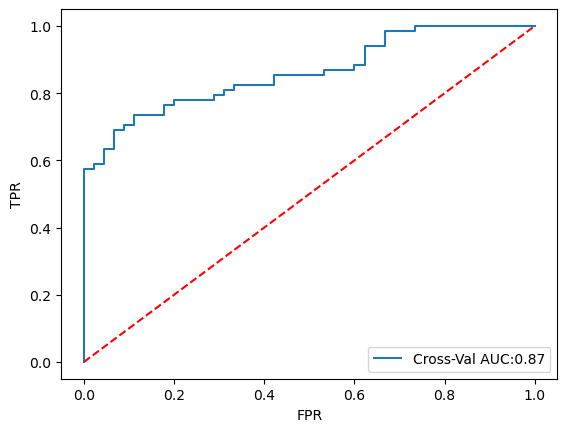

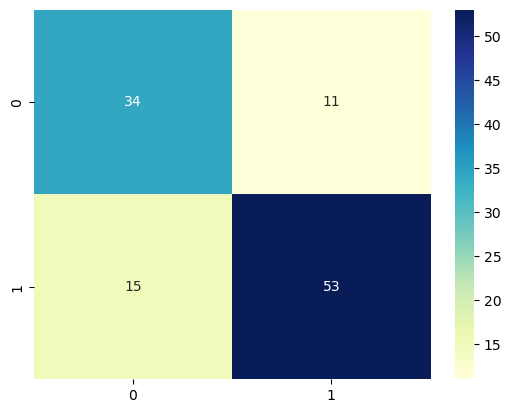

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

X, y = feature_selection_group2(RFE_features_LR_2)

print('LR')
classifier = LogisticRegression(fit_intercept=False, max_iter=100000).fit(X, y)
ROC_binary(classifier, 'Logistic Regression Default', X, y)

In [59]:
parameters = {'solver': ['saga'],
              'penalty': ['none', 'elasticnet'],
              'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
              
logreg_cv = GridSearchCV(classifier, parameters, cv=10, n_jobs=-1, verbose=1, 
                         refit=True, scoring='f1')
logreg_cv.fit(X, y)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(fit_intercept=False, max_iter=100000),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                         'penalty': ['none', 'elasticnet'],
                         'solver': ['saga']},
             scoring='f1', verbose=1)

In [60]:
print("Tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("Logistic Regression Optimized - accuracy:", logreg_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 10, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}
Logistic Regression Optimized - accuracy: 0.7976623376623376


Cross-Validation
Accuracy: 0.78 (+- 0.14 )
f1-score: 0.8 (+- 0.14 )
ROC: 0.86 (+- 0.12 )
Precision: 0.83 (+- 0.12 )
Recall: 0.78 (+- 0.18 )


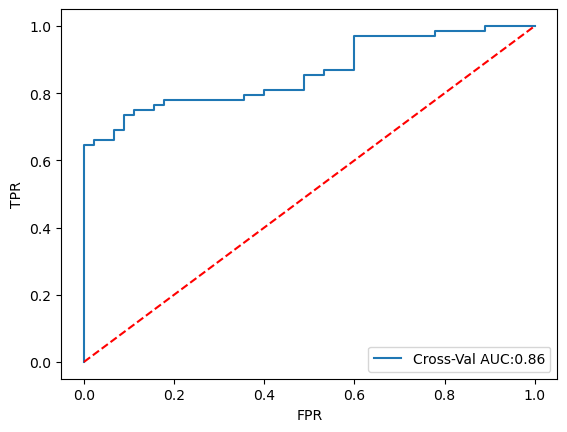

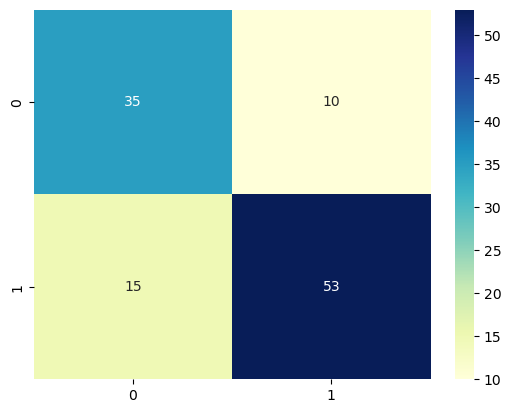

In [61]:
ROC_binary(logreg_cv.best_estimator_, 'Logistic Regression Optimized', X, y)

In [62]:
second_classifier = logreg_cv.best_estimator_

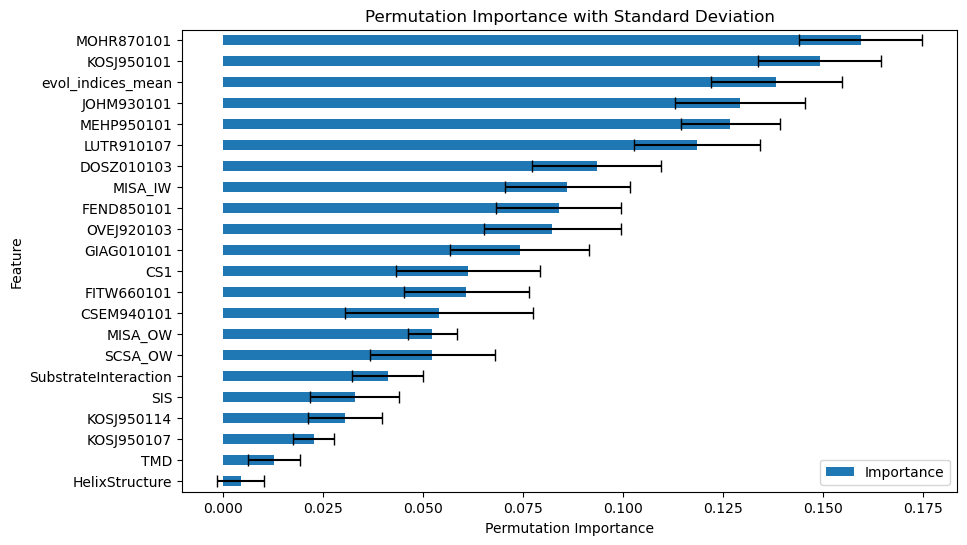

In [63]:
# Let's see the feature importance
from sklearn.inspection import permutation_importance

numerical_features_ = [x for x in RFE_features_LR_2 if x in numerical_features]
categorical_features_ = [x for x in RFE_features_LR_2 if x in categorical_features]

features_names = numerical_features_+categorical_features_

result = permutation_importance(second_classifier, X, y, n_repeats=10, random_state=42, scoring="f1")

feature_importance = pd.DataFrame({'Feature': features_names,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), xerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')
plt.savefig('2nd_FeatureImportance.png', bbox_inches = "tight")
plt.show()


In [64]:
feature_importance.head()
feature_importance.to_excel("SourceFile_suppfig33_FI2.xlsx")

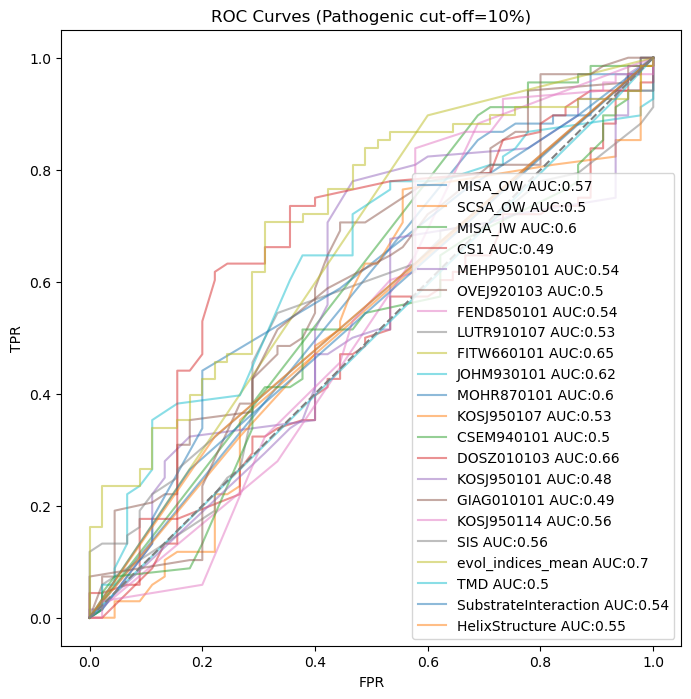

In [65]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Cut-off on 10 % 

mct8_rocs = mct8[mct8.index.isin(y.index)]

# ROC curves of features alones
fpr = {}
tpr = {}
thresholds = {}
roc_auc = {}
best_threshold = {}
plt.figure(figsize=(8, 8))
for i in RFE_features_LR_2:    
    if i in feat_positive_corr:
        fpr_i, tpr_i, thresholds_i = roc_curve(mct8_rocs['ClinSig'], -mct8_rocs[i].astype(float))
        roc_auc_i = roc_auc_score(mct8_rocs['ClinSig'], -mct8_rocs[i].astype(int))
    
        # Best Threshold by YoudenJ statistics
        youdenJ = tpr_i - fpr_i
        index = np.argmax(youdenJ)
        threshold_opt = round(thresholds_i[index], ndigits = 4)

        fpr[i] = fpr_i
        tpr[i] = tpr_i
        thresholds[i] = thresholds_i*-1
        roc_auc[i] = roc_auc_i
        best_threshold[i] = threshold_opt*-1

    else:
        fpr_i, tpr_i, thresholds_i = roc_curve(mct8_rocs['ClinSig'], mct8_rocs[i].astype(float))
        roc_auc_i = roc_auc_score(mct8_rocs['ClinSig'], mct8_rocs[i].astype(int))

        # Best Threshold by YoudenJ statistics
        youdenJ = tpr_i - fpr_i
        index = np.argmax(youdenJ)
        threshold_opt = round(thresholds_i[index], ndigits = 4)

        fpr[i] = fpr_i
        tpr[i] = tpr_i
        thresholds[i] = thresholds_i
        roc_auc[i] = roc_auc_i
        best_threshold[i] = threshold_opt

    
    plt.plot(fpr_i, tpr_i, label=i+' AUC:'+str(round(roc_auc_i, 2)), alpha=.5)
    
plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.title('ROC Curves (Pathogenic cut-off=10%)')
#plt.savefig('Pathogenic10_Prediction_ROCcurve.png')
plt.show()

In [66]:
for i in best_threshold.keys():
    mct8[i+'_class'] = 0
    if i in feat_positive_corr:
        mct8.loc[mct8[i]<=best_threshold[i], i+'_class'] = 1
    else:
        mct8.loc[mct8[i]>=best_threshold[i], i+'_class'] = 1
    
    print(f'Accuracy', i,':', len(mct8[mct8['ClinSig'] == mct8[i+'_class']])/len(mct8))

Accuracy MISA_OW : 0.6371681415929203
Accuracy SCSA_OW : 0.504424778761062
Accuracy MISA_IW : 0.6637168141592921
Accuracy CS1 : 0.4690265486725664
Accuracy MEHP950101 : 0.6814159292035398
Accuracy OVEJ920103 : 0.6460176991150443
Accuracy FEND850101 : 0.6548672566371682
Accuracy LUTR910107 : 0.5929203539823009
Accuracy FITW660101 : 0.6991150442477876
Accuracy JOHM930101 : 0.6371681415929203
Accuracy MOHR870101 : 0.584070796460177
Accuracy KOSJ950107 : 0.6371681415929203
Accuracy CSEM940101 : 0.5575221238938053
Accuracy DOSZ010103 : 0.6814159292035398
Accuracy KOSJ950101 : 0.5929203539823009
Accuracy GIAG010101 : 0.5752212389380531
Accuracy KOSJ950114 : 0.672566371681416
Accuracy SIS : 0.4690265486725664
Accuracy evol_indices_mean : 0.6902654867256637
Accuracy TMD : 0.39823008849557523
Accuracy SubstrateInteraction : 0.48672566371681414
Accuracy HelixStructure : 0.504424778761062


In [67]:
best_threshold

{'MISA_OW': 0.0,
 'SCSA_OW': 0.13,
 'MISA_IW': 0.0,
 'CS1': -0.994,
 'MEHP950101': 1.06,
 'OVEJ920103': 0.035,
 'FEND850101': 4.0,
 'LUTR910107': -5.0,
 'FITW660101': 1.0,
 'JOHM930101': -2.5,
 'MOHR870101': 7.0,
 'KOSJ950107': 1.4,
 'CSEM940101': -0.11,
 'DOSZ010103': 0.0,
 'KOSJ950101': 1.5,
 'GIAG010101': 0.0,
 'KOSJ950114': 1.4,
 'SIS': 26.315,
 'evol_indices_mean': 7.903,
 'TMD': 2.0,
 'SubstrateInteraction': 1.0,
 'HelixStructure': 1.0}

In [68]:
[x for x in best_threshold if x in feat_positive_corr]

['MISA_OW',
 'MISA_IW',
 'CS1',
 'MEHP950101',
 'OVEJ920103',
 'FEND850101',
 'LUTR910107',
 'FITW660101',
 'JOHM930101',
 'MOHR870101',
 'KOSJ950107',
 'CSEM940101',
 'DOSZ010103',
 'KOSJ950101',
 'GIAG010101',
 'KOSJ950114']

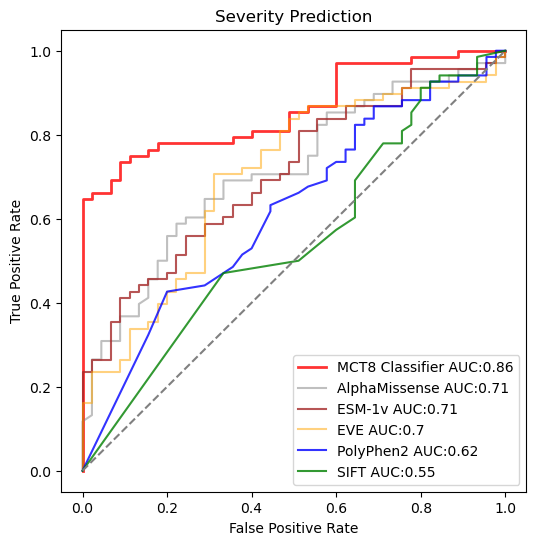

Classifier ROC auc splitting by variant:
Mean AUC: 0.86
Std AUC: 0.12


In [69]:
from sklearn.metrics import roc_curve, auc
# Cut-off on 10 % 

mct8_predictors = pd.read_csv('mct8_predictors.csv', index_col=0)
mct8_predictors = mct8_predictors[mct8_predictors['AA_change'].isin(y.index)] # keep those that are in the classifier train set

# Defining two different Classes
mct8_predictors = mct8_predictors[mct8_predictors.Activity <=50]
mct8_predictors.loc[(mct8_predictors['Activity'] > 10), 'ClinSig'] = 0
mct8_predictors.loc[mct8_predictors['Activity'] <= 10, 'ClinSig'] = 1

mct8_predictors = mct8_predictors[mct8_predictors.AA_change.isin(mct8_rocs.index.tolist())]

fpr_pp, tpr_pp, thresholds_pp = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.PolyPhen2_prob.astype(float))
roc_auc_pp = auc(fpr_pp, tpr_pp)

fpr_s, tpr_s, thresholds_s = roc_curve(mct8_predictors['ClinSig'], 1-mct8_predictors.SIFT_prob.astype(float))
roc_auc_s = auc(fpr_s, tpr_s)

fpr_am, tpr_am, thresholds_am = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.AM_prob.astype(float))
roc_auc_am = auc(fpr_am, tpr_am)

#mct8_gmvp = mct8_predictors.dropna()
#fpr_gmvp, tpr_gmvp, thresholds_gmvp = roc_curve(mct8_gmvp['ClinSig'], mct8_gmvp.gMVP_prob.astype(float))
#roc_auc_gmvp = auc(fpr_gmvp, tpr_gmvp)

fpr_esm1v, tpr_esm1v, thresholds_esm1v = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.ESM1v_prob.astype(float)*-1)
roc_auc_esm1v = auc(fpr_esm1v, tpr_esm1v)

fpr_eve_i, tpr_eve_i, thresholds_eve_i = roc_curve(mct8_rocs['ClinSig'], mct8_rocs.evol_indices_mean.astype(float))
roc_auc_eve_i = auc(fpr_eve_i, tpr_eve_i)

plt.figure(figsize=(6,6))

probas = cross_val_predict(second_classifier, X, y, method='predict_proba', n_jobs=-1, cv=10)
fpr, tpr, thresholds = roc_curve(y, probas[:,1])

scores_1 = cross_validate(second_classifier, X, y, n_jobs=-1, cv=10,
                        scoring=('accuracy', 'roc_auc'))  
plt.plot(fpr, tpr, label='MCT8 Classifier AUC:'+str(round(np.mean(scores_1['test_roc_auc']), 2)), 
         color='red', linewidth=2, alpha=.8)

#plt.plot(fpr_gmvp, tpr_gmvp, label='gMVP AUC:'+str(round(roc_auc_gmvp, 2)), color='purple', alpha=.8)
plt.plot(fpr_am, tpr_am, label='AlphaMissense AUC:'+str(round(roc_auc_am, 2)), color='grey', alpha=.5)
plt.plot(fpr_esm1v, tpr_esm1v, label='ESM-1v AUC:'+str(round(roc_auc_esm1v, 2)), color='brown', alpha=.8)
plt.plot(fpr_eve_i, tpr_eve_i, label='EVE AUC:'+str(round(roc_auc_eve_i, 2)), color='orange', alpha=.5)
plt.plot(fpr_pp, tpr_pp, label='PolyPhen2 AUC:'+str(round(roc_auc_pp, 2)), color='blue', alpha=.8)
plt.plot(fpr_s, tpr_s, label='SIFT AUC:'+str(round(roc_auc_s, 2)), color='green', alpha=.8)

plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Severity Prediction')
plt.savefig('Step2_CO10_ROCcurve.png')
plt.show()

print("Classifier ROC auc splitting by variant:")
print(f"Mean AUC:", round(np.mean(scores_1["test_roc_auc"]), 2))
print(f"Std AUC:", round(np.std(scores_1["test_roc_auc"]), 2))

In [70]:
# Save source file
y_ = pd.DataFrame(y)
y_["classifier_prob"] = probas[:,1]
y_.reset_index(inplace=True)
y_.head()

mct8_rocs_ = mct8_rocs.reset_index()
#mct8_rocs_.head()

y_ = y_.merge(mct8_predictors[["AA_change", "PolyPhen2_prob", "SIFT_prob", "AM_prob", "ESM1v_prob"]], on="AA_change").merge(mct8_rocs_[["AA_change", "evol_indices_mean"]], on="AA_change")
y_.to_excel("SourceFile_fig4_roc2.xlsx")
y_.head()

,AA_change,ClinSig,classifier_prob,PolyPhen2_prob,SIFT_prob,AM_prob,ESM1v_prob,evol_indices_mean
0,Pro233Ala,0.0,0.498622,0.989,0.00,0.8787,-8.055,5.533997
1,Pro532Ala,0.0,0.462837,0.988,1.00,0.7525,-6.218,6.454181
2,Pro537Ala,0.0,0.436430,0.946,0.00,0.5601,-6.044,5.127472
3,Glu170Ala,0.0,0.005881,0.998,0.03,0.9345,-6.012,9.140790
4,Gly196Ala,0.0,0.008245,0.994,1.00,0.4731,-3.998,5.172382


In [71]:
mct8_classifier_prob.shape

(237, 2)

In [72]:
mct8_classifier_prob = y.to_frame().reset_index()
mct8_classifier_prob["mct8_prob"] = probas[:,1]
mct8_classifier_prob = mct8_classifier_prob[["AA_change", "mct8_prob"]]
mct8_classifier_prob.head()

mct8_predictors.merge(mct8_classifier_prob, on="AA_change").to_csv("mct8_export_predictors_step2_all.csv")

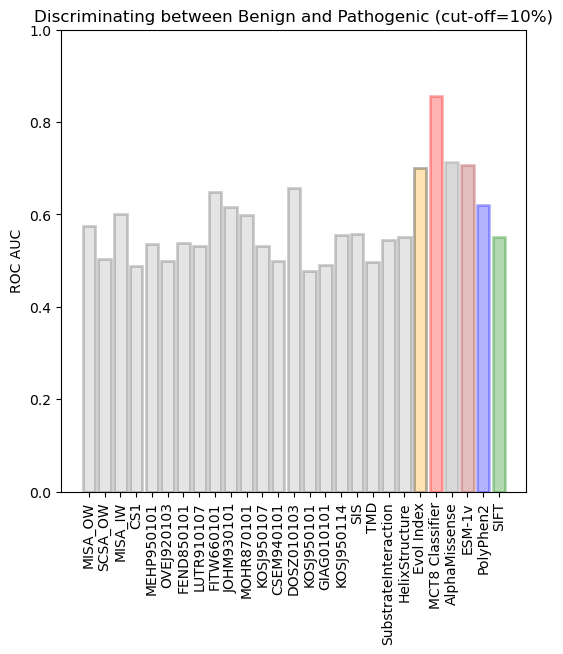

In [73]:
plt.figure(figsize=(6, 6))
for i in roc_auc.keys():
    if i != 'evol_indices_mean':
        plt.bar(i, roc_auc[i], color='grey', edgecolor='black', linewidth=2, alpha=0.2)

plt.bar('Evol Index', roc_auc_eve_i, color='orange', alpha=0.3, edgecolor='black', linewidth=2)
plt.bar('MCT8 Classifier', np.mean(scores_1['test_roc_auc']), color='red', alpha=0.3, edgecolor='red', linewidth=2)
#plt.bar('gMVP', roc_auc_gmvp, color='purple', alpha=0.3, edgecolor='purple', linewidth=2)
plt.bar('AlphaMissense', roc_auc_am, color='grey', alpha=0.3, edgecolor='grey', linewidth=2)
plt.bar('ESM-1v', roc_auc_esm1v, color='brown', alpha=0.3, edgecolor='brown', linewidth=2)
plt.bar('PolyPhen2', roc_auc_pp, color='blue', alpha=0.3, edgecolor='blue', linewidth=2)
plt.bar('SIFT', roc_auc_s, color='green', alpha=0.3, edgecolor='green', linewidth=2)
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.ylabel('ROC AUC')
plt.title('Discriminating between Benign and Pathogenic (cut-off=10%)')
plt.savefig('Step2_CO10_AUCs.png')
plt.show()

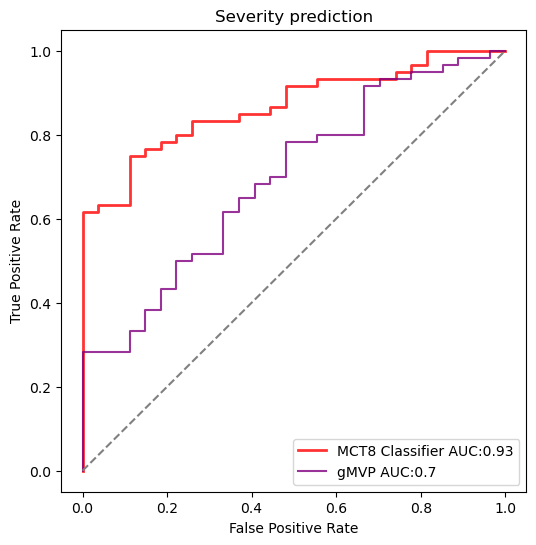

In [108]:
# The pre-scores of gMVP are for SNVs and doesn't include all possible missense
mct8_gmvp = mct8_predictors.dropna()
fpr_gmvp, tpr_gmvp, thresholds_gmvp = roc_curve(mct8_gmvp['ClinSig'], mct8_gmvp.gMVP_prob.astype(float))
roc_auc_gmvp = auc(fpr_gmvp, tpr_gmvp)

# Only subset of variants that are in the pre-calculated scores of gMVP
gmvp_subset = mct8_gmvp.AA_change.tolist()

y_gmvp = y.to_frame().reset_index()
index_gmvp = y_gmvp[y_gmvp.AA_change.isin(gmvp_subset)].index

plt.figure(figsize=(6,6))

probas = cross_val_predict(second_classifier, X[index_gmvp], y[index_gmvp], method='predict_proba', n_jobs=-1, cv=10)
fpr, tpr, thresholds = roc_curve(y[index_gmvp], probas[:,1])

scores_2 = cross_validate(second_classifier, X[index_gmvp], y[index_gmvp], n_jobs=-1, cv=10,
                        scoring=('accuracy', 'roc_auc'))  
plt.plot(fpr, tpr, label='MCT8 Classifier AUC:'+str(round(np.mean(scores_2['test_roc_auc']), 2)), 
         color='red', linewidth=2, alpha=.8)

plt.plot(fpr_gmvp, tpr_gmvp, label='gMVP AUC:'+str(round(roc_auc_gmvp, 2)), color='purple', alpha=.8)

plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Severity prediction')
plt.savefig('Step2_CO10_ROCcurve_gMVPsubset.png')
plt.show()

In [75]:
mct8_classifier_prob = y[index_gmvp].to_frame().reset_index()
mct8_classifier_prob["mct8_prob"] = probas[:,1]
mct8_classifier_prob = mct8_classifier_prob[["AA_change", "mct8_prob"]]
mct8_classifier_prob.head()

print(mct8_classifier_prob.shape)

mct8_gmvp.merge(mct8_classifier_prob, on="AA_change").to_csv("mct8_export_predictors_step2_gMVP.csv")

(87, 2)


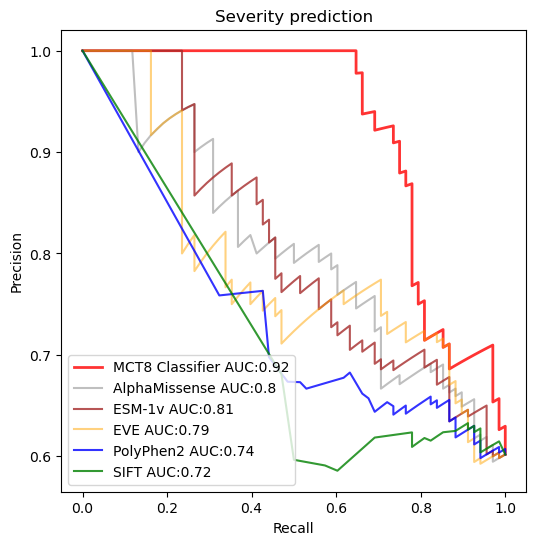

In [109]:
from sklearn.metrics import precision_recall_curve

# PRC curves
mct8_predictors = pd.read_csv('mct8_predictors.csv', index_col=0)
mct8_predictors = mct8_predictors[mct8_predictors['AA_change'].isin(y.index)] # keep those that are in the classifier train set

# Defining two different Classes
mct8_predictors = mct8_predictors[mct8_predictors.Activity <=50]
mct8_predictors.loc[(mct8_predictors['Activity'] > 10), 'ClinSig'] = 0
mct8_predictors.loc[mct8_predictors['Activity'] <= 10, 'ClinSig'] = 1

mct8_predictors = mct8_predictors[mct8_predictors.AA_change.isin(mct8_rocs.index.tolist())]

precision_pp, recall_pp, thresholds_pp = precision_recall_curve(mct8_predictors['ClinSig'], mct8_predictors.PolyPhen2_prob.astype(float))
prc_auc_pp = auc(recall_pp, precision_pp)

precision_s, recall_s, thresholds_s = precision_recall_curve(mct8_predictors['ClinSig'], 1-mct8_predictors.SIFT_prob.astype(float))
prc_auc_s = auc(recall_s, precision_s)

precision_am, recall_am, thresholds_am = precision_recall_curve(mct8_predictors['ClinSig'], mct8_predictors.AM_prob.astype(float))
prc_auc_am = auc(recall_am, precision_am)

#mct8_gmvp = mct8_predictors.dropna()
#precision_gmvp, recall_gmvp, thresholds_gmvp = precision_recall_curve(mct8_gmvp['ClinSig'], mct8_gmvp.gMVP_prob.astype(float))
#prc_auc_gmvp = auc(recall_gmvp, precision_gmvp)

precision_esm1v, recall_esm1v, thresholds_esm1v = precision_recall_curve(mct8_predictors['ClinSig'], mct8_predictors.ESM1v_prob.astype(float)*-1)
prc_auc_esm1v = auc(recall_esm1v, precision_esm1v)

precision_eve_i, recall_eve_i, thresholds_eve_i = precision_recall_curve(mct8_rocs['ClinSig'], mct8_rocs.evol_indices_mean.astype(float))
prc_auc_eve_i = auc(recall_eve_i, precision_eve_i)


plt.figure(figsize=(6,6))

probas = cross_val_predict(second_classifier, X, y, method='predict_proba', n_jobs=-1, cv=10)
precision, recall, thresholds = precision_recall_curve(y, probas[:,1])
prc_auc_classifier = auc(recall, precision)

plt.plot(recall, precision, label='MCT8 Classifier AUC:'+str(round(prc_auc_classifier, 2)), 
         color='red', linewidth=2, alpha=.8)

#plt.plot(recall_gmvp, precision_gmvp, label='gMVP AUC:'+str(round(prc_auc_gmvp, 2)), color='purple', alpha=.8)
plt.plot(recall_am, precision_am, label='AlphaMissense AUC:'+str(round(prc_auc_am, 2)), color='grey', alpha=.5)
plt.plot(recall_esm1v, precision_esm1v, label='ESM-1v AUC:'+str(round(prc_auc_esm1v, 2)), color='brown', alpha=.8)
plt.plot(recall_eve_i, precision_eve_i, label='EVE AUC:'+str(round(prc_auc_eve_i, 2)), color='orange', alpha=.5)
plt.plot(recall_pp, precision_pp, label='PolyPhen2 AUC:'+str(round(prc_auc_pp, 2)), color='blue', alpha=.8)
plt.plot(recall_s, precision_s, label='SIFT AUC:'+str(round(prc_auc_s, 2)), color='green', alpha=.8)


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.title('Severity prediction')
plt.savefig('Step2_CO10_PRCcurve.png')
plt.show()

In [77]:
print('Performance of classifiers for discriminating between Benign and Pathogenic (cut-off=50%):')
classifier_10_accuracy = round(accuracy_score(mct8_rocs['ClinSig'].astype(int), np.where(probas[:, 1]>0.5, 1, 0)), 2)
print(f'Accuracy:', classifier_10_accuracy)
classifier_10_precision = round(precision_score(mct8_rocs['ClinSig'].astype(int), np.where(probas[:, 1]>0.5, 1, 0)), 2)
print(f'Precision:', classifier_10_precision)
classifier_10_recall = round(recall_score(mct8_rocs['ClinSig'].astype(int), np.where(probas[:, 1]>0.5, 1, 0)), 2)
print(f'Recall:', classifier_10_recall)

Performance of classifiers for discriminating between Benign and Pathogenic (cut-off=50%):
Accuracy: 0.78
Precision: 0.84
Recall: 0.78


---
Let's see if the classifier is "memorizing" conserved sites. 
For evaluating this, splitting the dataset per position rather than variant is needed

In [78]:
# Get the variants positions
variants_positions = y.reset_index()
variants_positions["Position"] = variants_positions.AA_change.str[3:-3].tolist()
variants_positions.head()

,AA_change,ClinSig,Position
0,Pro233Ala,0.0,233
1,Pro532Ala,0.0,532
2,Pro537Ala,0.0,537
3,Glu170Ala,0.0,170
4,Gly196Ala,0.0,196


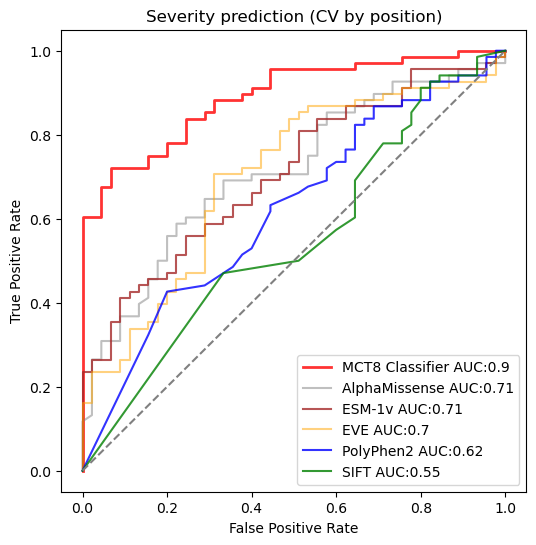

In [110]:
from sklearn.model_selection import GroupKFold

# ROC curves 
mct8_predictors = pd.read_csv('mct8_predictors.csv', index_col=0)
mct8_predictors = mct8_predictors[mct8_predictors['AA_change'].isin(y.index)] # keep those that are in the classifier train set

# Defining two different Classes
mct8_predictors = mct8_predictors[mct8_predictors.Activity <=50]
mct8_predictors.loc[(mct8_predictors['Activity'] > 10), 'ClinSig'] = 0
mct8_predictors.loc[mct8_predictors['Activity'] <= 10, 'ClinSig'] = 1

mct8_predictors = mct8_predictors[mct8_predictors.AA_change.isin(mct8_rocs.index.tolist())]

fpr_pp, tpr_pp, thresholds_pp = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.PolyPhen2_prob.astype(float))
roc_auc_pp = auc(fpr_pp, tpr_pp)

fpr_s, tpr_s, thresholds_s = roc_curve(mct8_predictors['ClinSig'], 1-mct8_predictors.SIFT_prob.astype(float))
roc_auc_s = auc(fpr_s, tpr_s)

fpr_am, tpr_am, thresholds_am = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.AM_prob.astype(float))
roc_auc_am = auc(fpr_am, tpr_am)

#mct8_gmvp = mct8_predictors.dropna()
#fpr_gmvp, tpr_gmvp, thresholds_gmvp = roc_curve(mct8_gmvp['ClinSig'], mct8_gmvp.gMVP_prob.astype(float))
#roc_auc_gmvp = auc(fpr_gmvp, tpr_gmvp)

fpr_esm1v, tpr_esm1v, thresholds_esm1v = roc_curve(mct8_predictors['ClinSig'], mct8_predictors.ESM1v_prob.astype(float)*-1)
roc_auc_esm1v = auc(fpr_esm1v, tpr_esm1v)


fpr_esm1v, tpr_esm1v, thresholds_esm1v = roc_curve(mct8_predictors['ClinSig'], 1-mct8_predictors.ESM1v_prob.astype(float))
roc_auc_esm1v = auc(fpr_esm1v, tpr_esm1v)

fpr_eve_i, tpr_eve_i, thresholds_eve_i = roc_curve(mct8_rocs['ClinSig'], mct8_rocs.evol_indices_mean.astype(float))
roc_auc_eve_i = auc(fpr_eve_i, tpr_eve_i)


plt.figure(figsize=(6,6))

probas = cross_val_predict(second_classifier, X, y, method='predict_proba', n_jobs=-1, cv=GroupKFold(n_splits=10),
                           groups=variants_positions.Position.tolist())
fpr, tpr, thresholds = roc_curve(y, probas[:,1])

scores_positions = cross_validate(second_classifier, X, y, n_jobs=-1, cv=GroupKFold(n_splits=10),
                                  groups=variants_positions.Position.tolist(), scoring=('accuracy', 'roc_auc'))  
plt.plot(fpr, tpr, label='MCT8 Classifier AUC:'+str(round(np.mean(scores_positions['test_roc_auc']), 2)), 
         color='red', linewidth=2, alpha=.8)

#plt.plot(fpr_gmvp, tpr_gmvp, label='gMVP AUC:'+str(round(roc_auc_gmvp, 2)), color='purple', alpha=.8)
plt.plot(fpr_am, tpr_am, label='AlphaMissense AUC:'+str(round(roc_auc_am, 2)), color='grey', alpha=.5)
plt.plot(fpr_esm1v, tpr_esm1v, label='ESM-1v AUC:'+str(round(roc_auc_esm1v, 2)), color='brown', alpha=.8)
plt.plot(fpr_eve_i, tpr_eve_i, label='EVE AUC:'+str(round(roc_auc_eve_i, 2)), color='orange', alpha=.5)
plt.plot(fpr_pp, tpr_pp, label='PolyPhen2 AUC:'+str(round(roc_auc_pp, 2)), color='blue', alpha=.8)
plt.plot(fpr_s, tpr_s, label='SIFT AUC:'+str(round(roc_auc_s, 2)), color='green', alpha=.8)


plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Severity prediction (CV by position)')
plt.savefig('Step2_C10_ROCcurve_splitpositions.png')
plt.show()

In [111]:
# Save source file
y_ = pd.DataFrame(y)
y_["classifier_prob"] = probas[:,1]
y_.reset_index(inplace=True)
y_.head()

mct8_rocs_ = mct8_rocs.reset_index()

y_ = y_.merge(mct8_predictors[["AA_change", "PolyPhen2_prob", "SIFT_prob", "AM_prob", "ESM1v_prob"]], on="AA_change").merge(mct8_rocs_[["AA_change", "evol_indices_mean"]], on="AA_change")
y_.to_excel("SourceFile_suppfig32_roc2.xlsx")
y_.head()

,AA_change,ClinSig,classifier_prob,PolyPhen2_prob,SIFT_prob,AM_prob,ESM1v_prob,evol_indices_mean
0,Pro233Ala,0.0,0.084439,0.989,0.00,0.8787,-8.055,5.533997
1,Pro532Ala,0.0,0.053912,0.988,1.00,0.7525,-6.218,6.454181
2,Pro537Ala,0.0,0.036436,0.946,0.00,0.5601,-6.044,5.127472
3,Glu170Ala,0.0,0.103969,0.998,0.03,0.9345,-6.012,9.140790
4,Gly196Ala,0.0,0.003104,0.994,1.00,0.4731,-3.998,5.172382


In [81]:
scores_positions = cross_validate(second_classifier, X, y, n_jobs=-1, cv=GroupKFold(n_splits=10),
                                  groups=variants_positions.Position.tolist(),
                                  scoring=('accuracy', 'roc_auc'))  

# The positions are splitted in the training and testing set correctly
print("Classifier ROC auc splitting by position:")
print(f"Mean AUC:", round(np.mean(scores_positions["test_roc_auc"]), 2))
print(f"Std AUC:", round(np.std(scores_positions["test_roc_auc"]), 2))

print("Classifier ROC auc splitting by variant:")
print(f"Mean AUC:", round(np.mean(scores_1["test_roc_auc"]), 2))
print(f"Std AUC:", round(np.std(scores_1["test_roc_auc"]), 2))

Classifier ROC auc splitting by position:
Mean AUC: 0.9
Std AUC: 0.1
Classifier ROC auc splitting by variant:
Mean AUC: 0.86
Std AUC: 0.12


---

In [82]:
# I want to check which are the variants that are incorrectly predicted
mct8 = pd.read_csv('MCT8_IA_dataset_T4.csv', index_col=0)
mct8.set_index('AA_change', inplace=True)

# Defining two different Classes - 1st step
mct8.loc[(mct8['Activity'] > 50), 'ClinSig'] = 0
mct8.loc[mct8['Activity'] <= 50, 'ClinSig'] = 1

# Defining the datasets
features = [x for x in mct8.columns if x not in ['Activity', 'Expression', 'PMExpression', 'LongPosition', 'ClinSig']]
X = mct8.loc[:, features]
y = mct8['ClinSig']

categorical_features = ['TMD', 'ICL', 'ECL', 'MembraneFacing', 'ChannelFacing', 'Buried',
                        'SubstrateInteraction', 'OSIR', 'TMDbinder', 'HelixStructure', 'LoopConformation']
numerical_features = [x for x in X.columns if x not in categorical_features]

X, y = feature_selection_group1(RFE_features_LR_1)
predict_1 = cross_val_predict(first_classifier, X, y, n_jobs=-1)     
probas_1 = cross_val_predict(first_classifier, X, y, n_jobs=-1, method='predict_proba')     

prediction_1 = pd.DataFrame()
prediction_1['AA_change'] = y.index
prediction_1['ClinSig'] = y.tolist()
prediction_1['Prediction'] = predict_1
prediction_1['Benign_proba'] = probas_1[:,0]
prediction_1['Pathogenic_proba'] = probas_1[:,1]

In [83]:
prediction_1.head()

,AA_change,ClinSig,Prediction,Benign_proba,Pathogenic_proba
0,Pro169Ala,0.0,0.0,0.955655,0.044345
1,Pro233Ala,1.0,0.0,0.817965,0.182035
2,Pro289Ala,0.0,0.0,0.772705,0.227295
3,Pro321Ala,0.0,0.0,0.730159,0.269841
4,Pro356Ala,0.0,0.0,0.893308,0.106692


In [84]:
prediction_pathogenic = prediction_1[(prediction_1.Prediction == 1) & (prediction_1.ClinSig == 0)]
prediction_pathogenic.head()

,AA_change,ClinSig,Prediction,Benign_proba,Pathogenic_proba
7,Pro412Ala,0.0,1.0,0.293808,0.706192
32,Gly186Ala,0.0,1.0,0.447509,0.552491
109,Trp398Ala,0.0,1.0,0.298994,0.701006
217,Ile437Ala,0.0,1.0,0.412124,0.587876
238,His551Ala,0.0,1.0,0.014480,0.985520


In [85]:
# Defining two different Classes
mct8_topredict = mct8[mct8.index.isin(prediction_pathogenic.AA_change.tolist())]

mct8 = mct8[mct8.Activity <=50]
mct8.loc[(mct8['Activity'] > 10), 'ClinSig'] = 0
mct8.loc[mct8['Activity'] <= 10, 'ClinSig'] = 1

# Defining the datasets
features = [x for x in mct8.columns if x not in ['Activity', 'Expression', 'PMExpression', 'LongPosition', 'ClinSig']]
X = mct8.loc[:, features]
y = mct8['ClinSig']

X, y = feature_selection_group2(RFE_features_LR_2)
predict_2 = cross_val_predict(second_classifier, X, y, n_jobs=-1)
probas_2 = cross_val_predict(second_classifier, X, y, n_jobs=-1, method='predict_proba')

##

X_topredict = mct8_topredict.loc[:, RFE_features_LR_2]
y_topredict = mct8_topredict['ClinSig']

X = mct8.loc[:, RFE_features_LR_2]
y = mct8['ClinSig']

# Pre-Processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

categorical_features_ = [x for x in X.columns if x in categorical_features]
numerical_features_ = [x for x in X.columns if x in numerical_features]

numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean')),
       ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent'))
      ])

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numerical_features_)
   ,('categorical', categorical_transformer, categorical_features_)
]) 

X = preprocessor.fit_transform(X)
X_topredict = preprocessor.transform(X_topredict)

predict_3 = second_classifier.predict(X_topredict)
probas_3 = second_classifier.predict_proba(X_topredict)

prediction_2 = pd.DataFrame()
prediction_2['AA_change'] = y.index
prediction_2['ClinSig'] = y.tolist()
prediction_2['Prediction'] = predict_2
prediction_2['Mild_proba'] = probas_2[:,0]
prediction_2['Severe_proba'] = probas_2[:,1]

prediction_3 = pd.DataFrame()
prediction_3['AA_change'] = y_topredict.index
prediction_3['ClinSig'] = y_topredict.tolist()
prediction_3['Prediction'] = predict_3
prediction_3['Mild_proba'] = probas_3[:,0]
prediction_3['Severe_proba'] = probas_3[:,1]

In [86]:
prediction_2 = prediction_2[~prediction_2.AA_change.isin(prediction_1.loc[prediction_1.Prediction == 0, 'AA_change'])]

In [87]:
prediction_2.ClinSig.replace({0:2, 1:3}, inplace=True)
prediction_2.Prediction.replace({0:2, 1:3}, inplace=True)
prediction_3.Prediction.replace({0:2, 1:3}, inplace=True)

In [88]:
prediction_2 = pd.concat([prediction_2, prediction_3])

In [89]:
prediction = pd.concat([prediction_1, prediction_2])
prediction = prediction[prediction.Prediction != 1]
prediction.Prediction.replace({0:'Benign', 2:'Mild Pathogenic', 3:'Severe Pathogenic'}, inplace=True)

In [90]:
prediction.tail()

,AA_change,ClinSig,Prediction,Benign_proba,Pathogenic_proba,Mild_proba,Severe_proba
18,Met533Ala,0.0,Severe Pathogenic,NaN,NaN,0.010305,0.989695
19,Arg245Ala,0.0,Mild Pathogenic,NaN,NaN,0.999985,0.000015
20,Gly295Arg,0.0,Severe Pathogenic,NaN,NaN,0.017591,0.982409
21,Asp240Ala,0.0,Mild Pathogenic,NaN,NaN,0.612129,0.387871
22,Gly541Cys,0.0,Severe Pathogenic,NaN,NaN,0.102938,0.897062


----
### Prediction analysis

In [91]:
mct8_EDA = pd.read_csv('MCT8_IA_dataset_T4.csv', index_col=0)

In [92]:
mct8_EDA.head()

,AA_change,Activity,Expression,PMExpression,LongPosition,TMD,ICL,ECL,MembraneFacing,ChannelFacing,...,FoldX_ddG_HM_IW,MISA,SASA,SCSA,SIS,MAESTRO_ddG,FoldX_ddG,dCOM,evol_indices_init,evol_indices_mean
0,Pro169Ala,95.8,NaN,NaN,169,0.0,1.0,0.0,0.0,0.0,...,1.7,0.045,38.905,0.00,0.0,0.583984,2.033333,26.782026,4.484985,4.504437
1,Pro233Ala,24.7,NaN,NaN,233,1.0,0.0,0.0,1.0,0.0,...,2.8,17.645,16.210,8.43,0.0,-0.502685,2.666667,14.001623,5.286438,5.533997
2,Pro289Ala,69.8,NaN,NaN,289,1.0,0.0,0.0,0.0,0.0,...,2.3,0.000,4.510,0.00,0.0,-0.469728,2.466667,13.171551,5.843872,5.583874
3,Pro321Ala,81.1,NaN,NaN,321,1.0,0.0,0.0,0.0,0.0,...,2.9,0.000,2.270,0.00,0.0,-0.382626,2.800000,18.156483,5.011963,5.110223
4,Pro356Ala,73.1,NaN,NaN,356,0.0,1.0,0.0,0.0,0.0,...,1.2,0.040,61.120,0.00,0.0,0.503667,1.400000,23.227317,6.271729,6.504669


In [93]:
mct8_EDA.columns.tolist()

['AA_change',
 'Activity',
 'Expression',
 'PMExpression',
 'LongPosition',
 'TMD',
 'ICL',
 'ECL',
 'MembraneFacing',
 'ChannelFacing',
 'Buried',
 'MISA_OW',
 'SASA_OW',
 'SCSA_OW',
 'SIS_OW',
 'MDS_OW',
 'RMSD',
 'SASA_IW',
 'MISA_IW',
 'SCSA_IW',
 'SIS_IW',
 'SubstrateInteraction',
 'OSIR',
 'TMDbinder',
 'HelixStructure',
 'LoopConformation',
 'CS1',
 'CS2',
 'CS3',
 'CS4',
 'dCOM_AF_OW',
 'dCOM_HM_IW',
 'dCOM_HM_OW',
 'MEHP950101',
 'KOSJ950113',
 'KOSJ950110',
 'OVEJ920103',
 'DAYM780302',
 'MUET010101',
 'LUTR910102',
 'DOSZ010104',
 'FEND850101',
 'LUTR910107',
 'KOSJ950104',
 'OVEJ920105',
 'LUTR910108',
 'GONG920101',
 'ALTS910101',
 'PRLA000101',
 'NGPC000101',
 'PRLA000102',
 'BENS940102',
 'GRAR740104',
 'RUSR970103',
 'KOSJ950115',
 'TUDE900101',
 'FITW660101',
 'LUTR910106',
 'KOSJ950112',
 'OGAK980101',
 'NIEK910101',
 'JOHM930101',
 'AZAE970102',
 'LUTR910101',
 'GEOD900101',
 'AZAE970101',
 'LUTR910105',
 'MOHR870101',
 'BENS940104',
 'KOSJ950105',
 'BENS940101',
 'K

In [94]:
mct8_prediction_1 = mct8_EDA.merge(prediction_1, on='AA_change')
mct8_prediction_2 = mct8_EDA.merge(prediction_2, on='AA_change')
mct8_prediction = mct8_EDA.merge(prediction, on='AA_change')

In [95]:
mct8_prediction_1

,AA_change,Activity,Expression,PMExpression,LongPosition,TMD,ICL,ECL,MembraneFacing,ChannelFacing,...,SIS,MAESTRO_ddG,FoldX_ddG,dCOM,evol_indices_init,evol_indices_mean,ClinSig,Prediction,Benign_proba,Pathogenic_proba
0,Pro169Ala,95.8,NaN,NaN,169,0.0,1.0,0.0,0.0,0.0,...,0.000,0.583984,2.033333,26.782026,4.484985,4.504437,0.0,0.0,0.955655,0.044345
1,Pro233Ala,24.7,NaN,NaN,233,1.0,0.0,0.0,1.0,0.0,...,0.000,-0.502685,2.666667,14.001623,5.286438,5.533997,1.0,0.0,0.817965,0.182035
2,Pro289Ala,69.8,NaN,NaN,289,1.0,0.0,0.0,0.0,0.0,...,0.000,-0.469728,2.466667,13.171551,5.843872,5.583874,0.0,0.0,0.772705,0.227295
3,Pro321Ala,81.1,NaN,NaN,321,1.0,0.0,0.0,0.0,0.0,...,0.000,-0.382626,2.800000,18.156483,5.011963,5.110223,0.0,0.0,0.730159,0.269841
4,Pro356Ala,73.1,NaN,NaN,356,0.0,1.0,0.0,0.0,0.0,...,0.000,0.503667,1.400000,23.227317,6.271729,6.504669,0.0,0.0,0.893308,0.106692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Asp498Asn,4.8,83.8,106.6,498,1.0,0.0,0.0,0.0,0.0,...,26.315,0.071375,1.200000,10.968726,7.860901,7.997272,1.0,1.0,0.089268,0.910732
476,Met476Ile,104.5,NaN,NaN,476,1.0,0.0,0.0,1.0,0.0,...,0.000,-0.363989,1.000000,22.697429,1.725952,1.793298,0.0,0.0,0.984470,0.015530
477,Val489Asp,40.1,NaN,NaN,489,1.0,0.0,0.0,1.0,0.0,...,0.000,-0.645502,0.100000,24.062603,9.147888,9.454669,1.0,1.0,0.114928,0.885072
478,Ala553Asp,18.1,66.5,34.4,553,1.0,0.0,0.0,0.0,0.0,...,0.000,-0.089654,4.100000,21.964107,9.257019,9.531854,1.0,1.0,0.040645,0.959355


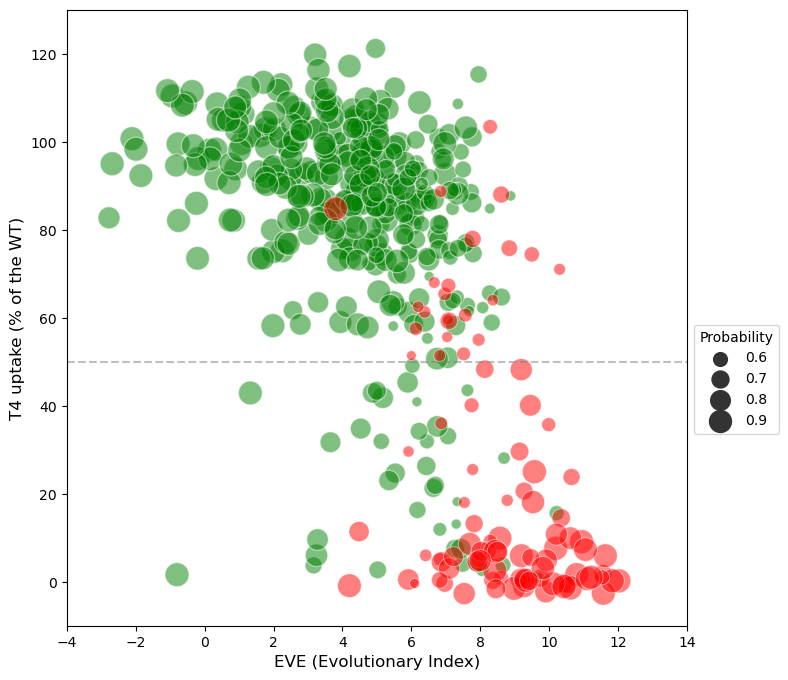

In [96]:
plt.figure(figsize=(8, 8), facecolor='white')
sns.scatterplot(data=mct8_prediction_1[mct8_prediction_1['Prediction']==0], x='evol_indices_mean', y='Activity', 
                size='Benign_proba', sizes=(50, 300), color='green', alpha=0.5)
sns.scatterplot(data=mct8_prediction_1[mct8_prediction_1['Prediction']==1], x='evol_indices_mean', y='Activity', 
                size='Pathogenic_proba', sizes=(50, 300), color='red', alpha=0.5, legend=False)
plt.legend(title='Probability', bbox_to_anchor=(1, 0.5))
plt.axhline(y=50, color='grey', alpha=0.5, linestyle='--')
plt.xlim(-4, 14)
plt.ylim(-10, 130)
plt.ylabel('T4 uptake (% of the WT)', size=12)
plt.xlabel('EVE (Evolutionary Index)', size=12)
plt.savefig('Step1_prediction_ActivityvsEvolInd.png')

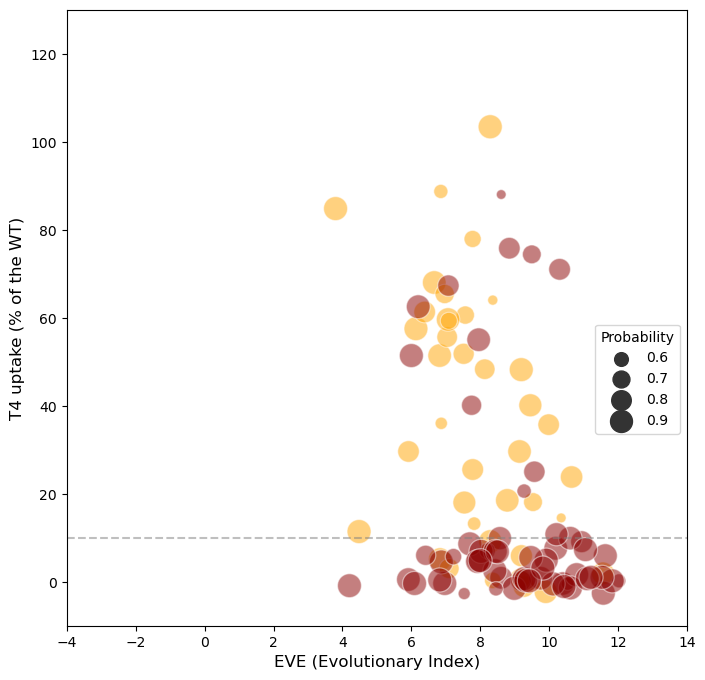

In [97]:
plt.figure(figsize=(8, 8), facecolor='white')
sns.scatterplot(data=mct8_prediction_2[mct8_prediction_2['Prediction']==2], x='evol_indices_mean', y='Activity', 
                size='Mild_proba', sizes=(50, 300), color='orange', alpha=0.5)
sns.scatterplot(data=mct8_prediction_2[mct8_prediction_2['Prediction']==3], x='evol_indices_mean', y='Activity', 
                size='Severe_proba', sizes=(50, 300), color='darkred', alpha=0.5, legend=False)
plt.legend(title='Probability', bbox_to_anchor=(1, 0.5))
plt.axhline(y=10, color='grey', alpha=0.5, linestyle='--')
plt.xlim(-4, 14)
plt.ylim(-10, 130)
plt.ylabel('T4 uptake (% of the WT)', size=12)
plt.xlabel('EVE (Evolutionary Index)', size=12)
plt.savefig('Step2_prediction_ActivityvsEvolInd.png')

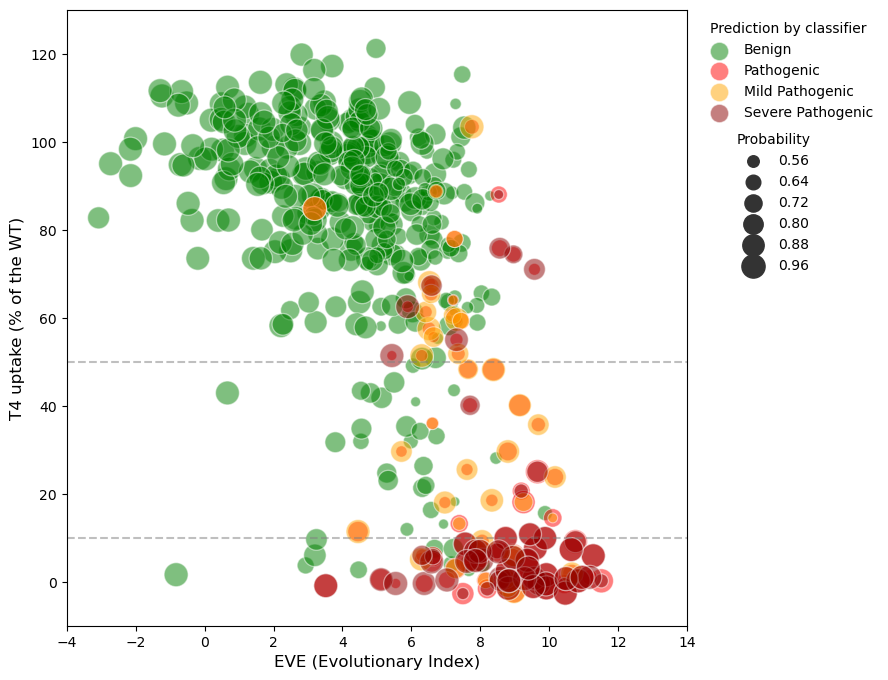

In [98]:
plt.figure(figsize=(8, 8), facecolor='white')
benign = sns.scatterplot(data=mct8_prediction_1[mct8_prediction_1['Prediction']==0], x='evol_indices_init', y='Activity', 
                size='Benign_proba', sizes=(50, 300), color='green', alpha=0.5, legend=False)
pathogenic = sns.scatterplot(data=mct8_prediction_1[mct8_prediction_1['Prediction']==1], x='evol_indices_init', y='Activity', 
                size='Pathogenic_proba', sizes=(50, 300), color='red', alpha=0.5, marker='o', legend=False)
mild = sns.scatterplot(data=mct8_prediction_2[mct8_prediction_2['Prediction']==2], x='evol_indices_init', y='Activity', 
                size='Mild_proba', sizes=(50, 300), color='orange', alpha=0.5, legend=False)
severe = sns.scatterplot(data=mct8_prediction_2[mct8_prediction_2['Prediction']==3], x='evol_indices_init', y='Activity', 
                size='Severe_proba', sizes=(50, 300), color='darkred', alpha=0.5, legend=True)

legend1 = plt.legend(title='Probability', bbox_to_anchor=(1.22, 0.82), edgecolor='white')
legend2 = plt.legend(title='Prediction by classifier', labels=['Benign', 'Pathogenic', 'Mild Pathogenic', 'Severe Pathogenic'],
                     bbox_to_anchor=(1.32, 1), edgecolor='white')         
plt.gca().add_artist(legend1)
plt.axhline(y=50, color='grey', alpha=0.5, linestyle='--')
plt.axhline(y=10, color='grey', alpha=0.5, linestyle='--')
plt.xlim(-4, 14)
plt.ylim(-10, 130)
plt.ylabel('T4 uptake (% of the WT)', size=12)
plt.xlabel('EVE (Evolutionary Index)', size=12)
plt.savefig('WholePrediction_ActivityvsEvolInd.png', bbox_inches='tight')

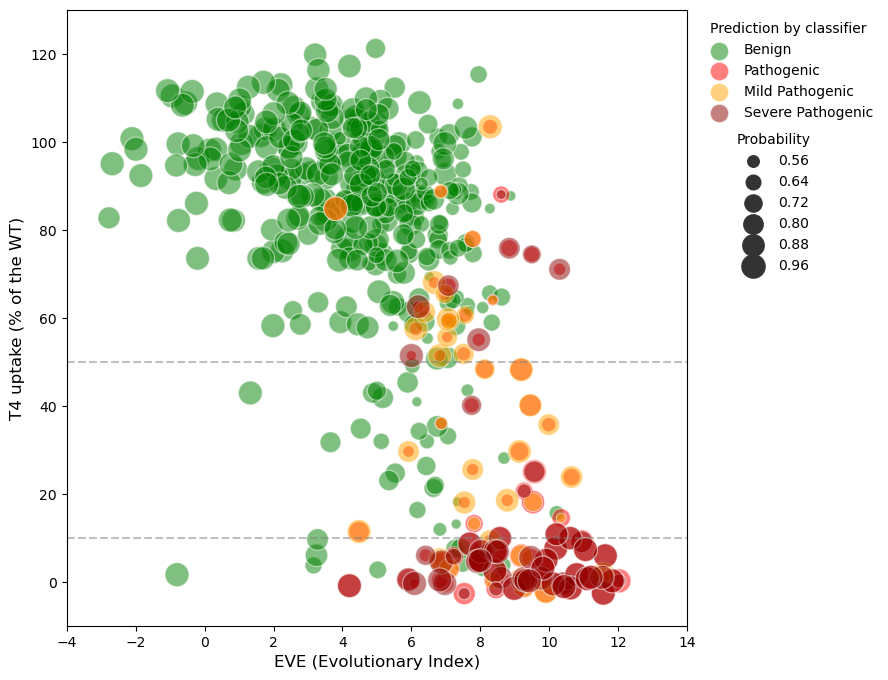

In [99]:
plt.figure(figsize=(8, 8), facecolor='white')
benign = sns.scatterplot(data=mct8_prediction_1[mct8_prediction_1['Prediction']==0], x='evol_indices_mean', y='Activity', 
                size='Benign_proba', sizes=(50, 300), color='green', alpha=0.5, legend=False)
pathogenic = sns.scatterplot(data=mct8_prediction_1[mct8_prediction_1['Prediction']==1], x='evol_indices_mean', y='Activity', 
                size='Pathogenic_proba', sizes=(50, 300), color='red', alpha=0.5, marker='o', legend=False)
mild = sns.scatterplot(data=mct8_prediction_2[mct8_prediction_2['Prediction']==2], x='evol_indices_mean', y='Activity', 
                size='Mild_proba', sizes=(50, 300), color='orange', alpha=0.5, legend=False)
severe = sns.scatterplot(data=mct8_prediction_2[mct8_prediction_2['Prediction']==3], x='evol_indices_mean', y='Activity', 
                size='Severe_proba', sizes=(50, 300), color='darkred', alpha=0.5, legend=True)

legend1 = plt.legend(title='Probability', bbox_to_anchor=(1.22, 0.82), edgecolor='white')
legend2 = plt.legend(title='Prediction by classifier', labels=['Benign', 'Pathogenic', 'Mild Pathogenic', 'Severe Pathogenic'],
                     bbox_to_anchor=(1.32, 1), edgecolor='white')         
plt.gca().add_artist(legend1)
plt.axhline(y=50, color='grey', alpha=0.5, linestyle='--')
plt.axhline(y=10, color='grey', alpha=0.5, linestyle='--')
plt.xlim(-4, 14)
plt.ylim(-10, 130)
plt.ylabel('T4 uptake (% of the WT)', size=12)
plt.xlabel('EVE (Evolutionary Index)', size=12)
plt.savefig('WholePrediction_ActivityvsEvolInd.png', bbox_inches='tight')

In [100]:
# Source File
prediction_merge = pd.merge( mct8_prediction_1[["AA_change", "Activity", "evol_indices_mean", "Prediction", "Benign_proba", "Pathogenic_proba"]], mct8_prediction_2[["AA_change", "Prediction", "Mild_proba", "Severe_proba"]], on="AA_change", how="left")
prediction_merge.rename(columns={"Prediction_x":"Prediction_step1", "Prediction_y":"Prediction_step2"}, inplace=True)
prediction_merge.to_excel("SourceFile_fig4_scatter.xlsx")

In [101]:
mct8_prediction_1_patients = mct8_prediction_1[~mct8_prediction_1.AA_change.str.endswith("Ala")]
mct8_prediction_2_patients = mct8_prediction_2[~mct8_prediction_2.AA_change.str.endswith("Ala")]

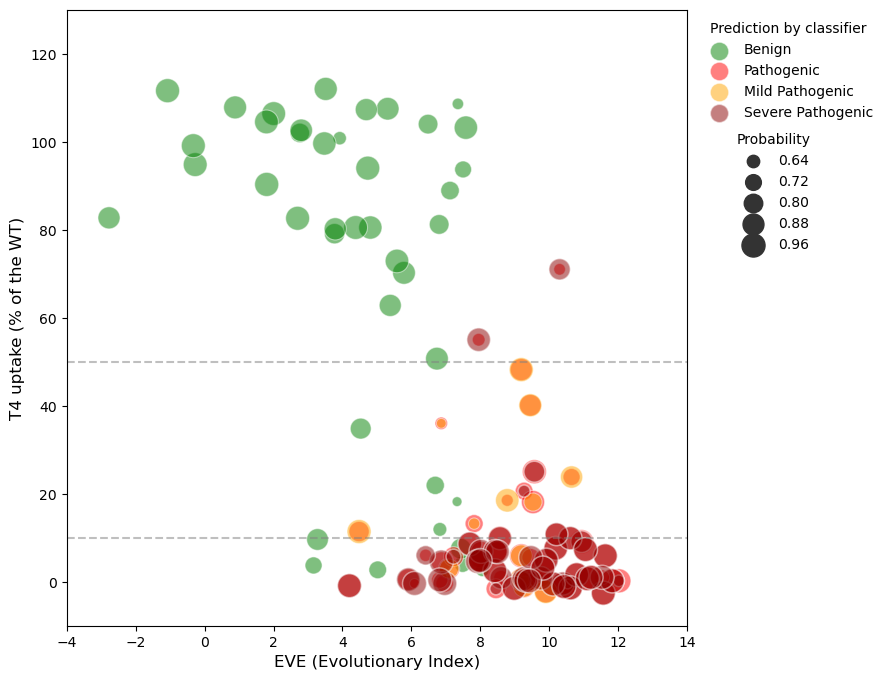

In [102]:
plt.figure(figsize=(8, 8), facecolor='white')
benign = sns.scatterplot(data=mct8_prediction_1_patients[mct8_prediction_1_patients['Prediction']==0], x='evol_indices_mean', y='Activity', 
                size='Benign_proba', sizes=(50, 300), color='green', alpha=0.5, legend=False)
pathogenic = sns.scatterplot(data=mct8_prediction_1_patients[mct8_prediction_1_patients['Prediction']==1], x='evol_indices_mean', y='Activity', 
                size='Pathogenic_proba', sizes=(50, 300), color='red', alpha=0.5, marker='o', legend=False)
mild = sns.scatterplot(data=mct8_prediction_2_patients[mct8_prediction_2_patients['Prediction']==2], x='evol_indices_mean', y='Activity', 
                size='Mild_proba', sizes=(50, 300), color='orange', alpha=0.5, legend=False)
severe = sns.scatterplot(data=mct8_prediction_2_patients[mct8_prediction_2_patients['Prediction']==3], x='evol_indices_mean', y='Activity', 
                size='Severe_proba', sizes=(50, 300), color='darkred', alpha=0.5, legend=True)

legend1 = plt.legend(title='Probability', bbox_to_anchor=(1.22, 0.82), edgecolor='white')
legend2 = plt.legend(title='Prediction by classifier', labels=['Benign', 'Pathogenic', 'Mild Pathogenic', 'Severe Pathogenic'],
                     bbox_to_anchor=(1.32, 1), edgecolor='white')         
plt.gca().add_artist(legend1)
plt.axhline(y=50, color='grey', alpha=0.5, linestyle='--')
plt.axhline(y=10, color='grey', alpha=0.5, linestyle='--')
plt.xlim(-4, 14)
plt.ylim(-10, 130)
plt.ylabel('T4 uptake (% of the WT)', size=12)
plt.xlabel('EVE (Evolutionary Index)', size=12)
plt.savefig('WholePrediction_ActivityvsEvolInd_patients.png', bbox_inches='tight')

In [103]:
# Source File
prediction_merge_patients = pd.merge( mct8_prediction_1_patients[["AA_change", "Activity", "evol_indices_mean", "Prediction", "Benign_proba", "Pathogenic_proba"]], mct8_prediction_2_patients[["AA_change", "Prediction", "Mild_proba", "Severe_proba"]], on="AA_change", how="left")
prediction_merge_patients.rename(columns={"Prediction_x":"Prediction_step1", "Prediction_y":"Prediction_step2"}, inplace=True)
prediction_merge_patients.to_excel("SourceFile_suppfig27_scatter.xlsx")

In [104]:
mct8_prediction.Prediction.replace({'Benign':0, 'Mild Pathogenic':2, 'Severe Pathogenic':3}, inplace=True)

In [105]:
mct8_prediction.loc[mct8_prediction.ClinSig != mct8_prediction.Prediction, ['AA_change', 'ClinSig', 'Prediction']]

,AA_change,ClinSig,Prediction
1,Pro233Ala,1.0,0
7,Pro412Ala,0.0,2
11,Pro532Ala,1.0,0
12,Pro537Ala,1.0,0
32,Gly186Ala,0.0,2
...,...,...,...
448,Gly527Ser,1.0,0
463,Leu433His,2.0,3
464,Leu434Trp,2.0,3
469,Ser519Leu,1.0,0


In [106]:
mct8_prediction.loc[mct8_prediction.ClinSig != mct8_prediction.Prediction, ['AA_change', 'ClinSig', 'Prediction']].to_csv('MCT8_mispredicted.csv')

In [107]:
mct8_prediction.loc[(mct8_prediction.ClinSig != mct8_prediction.Prediction) & (mct8_prediction.ClinSig==0), ['AA_change', 'ClinSig', 'Prediction']]

,AA_change,ClinSig,Prediction
7,Pro412Ala,0.0,2
32,Gly186Ala,0.0,2
109,Trp398Ala,0.0,3
217,Ile437Ala,0.0,2
238,His551Ala,0.0,2
259,Leu259Ala,0.0,2
265,Leu302Ala,0.0,3
270,Leu340Ala,0.0,2
281,Leu433Ala,0.0,2
282,Leu434Ala,0.0,2
